<a href="https://colab.research.google.com/github/guyso2014/python/blob/main/synthetic_appliances_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [ ]:

class SyntheticDataGenerator:
    def __init__(self):
        pass

    def generate_usage_pattern(self, appliance_type, total_hours_per_year, seasons):
        usage_pattern = np.zeros(total_hours_per_year)

        if appliance_type == 'Refrigerator':
            usage_pattern += np.random.normal(100, 5, total_hours_per_year)
        elif appliance_type == 'Air Conditioner':
            start = sum(seasons[s] for s in ['Winter', 'Spring'])
            end = start + seasons['Summer']
            usage_pattern[start:end] = np.random.normal(2000, 50, seasons['Summer'])
        elif appliance_type == 'Washing Machine':
            usage_times = np.random.choice(total_hours_per_year, size=1000, replace=False)
            usage_pattern[usage_times] = np.random.normal(500, 20, len(usage_times))
        else:
            usage_times = np.random.choice(total_hours_per_year, size=500, replace=False)
            usage_pattern[usage_times] = np.random.normal(1000, 30, len(usage_times))

        return np.clip(usage_pattern, 0, None)

    def generate_synthetic_weather_data(self, appliance_data):
        np.random.seed(0)
        dates = dates = pd.to_datetime(appliance_data['Datetime'], format='%d.%m.%Y %H:%M:%S')

        seasons = {
            'Winter': {'temperature_mean': 5, 'temperature_std': 5, 'humidity_mean': 70, 'humidity_std': 10, 'rain_mean': 0.1, 'rain_std': 0.05, 'snow_mean': 0.2, 'snow_std': 0.1, 'wind_mean': 10, 'wind_std': 5, 'clouds_mean': 50, 'clouds_std': 10},
            'Spring': {'temperature_mean': 15, 'temperature_std': 5, 'humidity_mean': 60, 'humidity_std': 10, 'rain_mean': 0.3, 'rain_std': 0.1, 'snow_mean': 0, 'snow_std': 0, 'wind_mean': 15, 'wind_std': 5, 'clouds_mean': 40, 'clouds_std': 10},
            'Summer': {'temperature_mean': 25, 'temperature_std': 5, 'humidity_mean': 70, 'humidity_std': 10, 'rain_mean': 0.2, 'rain_std': 0.1, 'snow_mean': 0, 'snow_std': 0, 'wind_mean': 10, 'wind_std': 5, 'clouds_mean': 30, 'clouds_std': 10},
            'Autumn': {'temperature_mean': 15, 'temperature_std': 5, 'humidity_mean': 70, 'humidity_std': 10, 'rain_mean': 0.2, 'rain_std': 0.1, 'snow_mean': 0, 'snow_std': 0, 'wind_mean': 15, 'wind_std': 5, 'clouds_mean': 40, 'clouds_std': 10}
        }

        temperatures, humidities, rains, snows, winds, clouds = [], [], [], [], [], []

        for date in dates:
            season = date.month // 3 % 4
            season_name = ['Winter', 'Spring', 'Summer', 'Autumn'][season]
            params = seasons[season_name]

            temperature = max(0, np.random.normal(params['temperature_mean'], params['temperature_std']))
            humidity = max(0, np.random.normal(params['humidity_mean'], params['humidity_std']))
            rain = max(0, np.random.normal(params['rain_mean'], params['rain_std']))
            snow = max(0, np.random.normal(params['snow_mean'], params['snow_std']))
            wind = max(0, np.random.normal(params['wind_mean'], params['wind_std']))
            cloud = max(0, np.random.normal(params['clouds_mean'], params['clouds_std']))

            temperatures.append(temperature)
            humidities.append(humidity)
            rains.append(rain)
            snows.append(snow)
            winds.append(wind)
            clouds.append(cloud)

        weather_df = pd.DataFrame({
            'Datetime': dates,
            'Temperature': temperatures,
            'Humidity': humidities,
            'Rain': rains,
            'Snow': snows,
            'Wind': winds,
            'Clouds': clouds
        })
        return weather_df

    def generate_hourly_synthetic_appliance_data(self):
        appliance_types = ['Refrigerator', 'Washing Machine', 'Microwave', 'Air Conditioner', 'Dishwasher', 'Oven', 'Vacuum Cleaner']
        brands = ['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE']
        energy_ratings = ['A++', 'A+', 'A', 'B', 'C']

        seasons = {
            'Winter': 90 * 24,
            'Spring': 92 * 24,
            'Summer': 92 * 24,
            'Autumn': 91 * 24
        }

        total_hours_per_year = sum(seasons.values())

        houses_data = []
        start_datetime = datetime(2023, 1, 1)
        for house_id in range(1, 11):
            for appliance_type in appliance_types:
                usage_pattern = self.generate_usage_pattern(appliance_type, total_hours_per_year, seasons)
                appliance_id = f'H{house_id:02}_AP{appliance_types.index(appliance_type):02}'
                brand = random.choice(brands)
                model = f'M{random.randint(1000, 9999)}'
                efficiency_rating = random.choice(energy_ratings)

                datetimes = [start_datetime + timedelta(hours=i) for i in range(total_hours_per_year)]
                datetime_strings = [dt.strftime("%d.%m.%Y %H:%M:%S") for dt in datetimes]




                appliance_data = pd.DataFrame({
                    'House ID': house_id,
                    'Appliance ID': appliance_id,
                    'Appliance Type': appliance_type,
                    'Brand': brand,
                    'Model': model,
                    'Energy Efficiency Rating': efficiency_rating,
                    'Datetime': datetime_strings,
                    'Power Consumption (W)': usage_pattern
                })

                appliance_data['Datetime'] = pd.to_datetime(appliance_data['Datetime'], format='%d.%m.%Y %H:%M:%S')


                weather_df = self.generate_synthetic_weather_data(appliance_data)
                merged_df = pd.merge(appliance_data, weather_df, on='Datetime', how='left')

                houses_data.append(merged_df)

        return houses_data

    def calculate_usage_stats(self, df):
        usage_stats = []
        threshold = 10

        for (house_id, appliance_id, appliance_type), group in df.groupby(['House ID', 'Appliance ID', 'Appliance Type']):
            daily_usage = group.groupby(group['Datetime'].dt.date)['Power Consumption (W)'].apply(lambda x: (x > threshold).sum())
            daily_power_consumption = group.groupby(group['Datetime'].dt.date)['Power Consumption (W)'].sum()

            usage_frequency = daily_usage.mean()
            average_usage_duration = daily_usage[daily_usage > 0].mean() * 60

            for date, usage_count in daily_usage.items():
                usage_stats.append({
                    'House ID': house_id,
                    'Appliance ID': appliance_id,
                    'Appliance Type': appliance_type,
                    'Date': date,
                    'Usage Frequency (per day)': usage_count,
                    'Average Usage Duration (minutes)': usage_count * 60 if usage_count > 0 else 0,
                    'Power Consumption (W) daily': daily_power_consumption[date],
                    'Temperature': group[group['Datetime'].dt.date == date]['Temperature'].mean(),
                    'Humidity': group[group['Datetime'].dt.date == date]['Humidity'].mean(),
                    'Rain': group[group['Datetime'].dt.date == date]['Rain'].mean(),
                    'Snow': group[group['Datetime'].dt.date == date]['Snow'].mean(),
                    'Wind': group[group['Datetime'].dt.date == date]['Wind'].mean(),
                    'Clouds': group[group['Datetime'].dt.date == date]['Clouds'].mean()
                })

        return pd.DataFrame(usage_stats)

    def generate_daily_synthetic_appliance_data(self):
        houses_data = self.generate_hourly_synthetic_appliance_data()
        df = pd.concat(houses_data, ignore_index=True)

        df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S')
        df['Date'] = df['Datetime'].dt.date

        usage_stats_df = self.calculate_usage_stats(df)

        usage_stats_df['Date'] = pd.to_datetime(usage_stats_df['Date'])
        usage_stats_df['Day of Week'] = usage_stats_df['Date'].dt.dayofweek
        usage_stats_df['Month'] = usage_stats_df['Date'].dt.month
        usage_stats_df['Hour'] = usage_stats_df['Date'].dt.hour

        usage_stats_df['Avg Temperature'] = usage_stats_df.groupby('Date')['Temperature'].transform('mean')
        usage_stats_df['Avg Humidity'] = usage_stats_df.groupby('Date')['Humidity'].transform('mean')

        holidays = ['2024-01-01', '2024-05-01', '2024-07-04', '2024-09-02', '2024-11-28', '2024-12-25']
        usage_stats_df['Holiday'] = usage_stats_df['Date'].isin(holidays).astype(int)

        usage_stats_df.fillna(method='ffill', inplace=True)

        usage_stats_df['Prev Energy Consumption (W) per day'] = usage_stats_df['Power Consumption (W) daily'].shift(1)
        usage_stats_df['Prev Energy Consumption (W) per day'].fillna(method='ffill', inplace=True)
        usage_stats_df['Prev Energy Consumption (W) per day'].fillna(1, inplace=True)

        usage_stats_df['Rolling Avg Energy Consumption (W) per day'] = usage_stats_df['Power Consumption (W) daily'].rolling(window=3).mean()
        usage_stats_df['Rolling Avg Energy Consumption (W) per day'].fillna(1, inplace=True)

        return usage_stats_df

    def calculate_total_power_consumption(self):
        daily_synthetic_appliance_data = self.generate_daily_synthetic_appliance_data()
        total_power_consumption = daily_synthetic_appliance_data.groupby(['House ID', 'Date']).agg({
            'Usage Frequency (per day)': 'sum',
            'Average Usage Duration (minutes)': 'mean',
            'Power Consumption (W) daily': 'sum',
            'Temperature': 'mean',
            'Humidity': 'mean',
            'Rain': 'mean',
            'Snow': 'mean',
            'Wind': 'mean',
            'Clouds': 'mean',
            'Day of Week': 'mean',
            'Month': 'mean',
            'Hour': 'mean',
            'Avg Temperature': 'mean',
            'Avg Humidity': 'mean',
            'Holiday': 'mean',
            'Prev Energy Consumption (W) per day': 'sum',
            'Rolling Avg Energy Consumption (W) per day': 'sum'
        }).reset_index()

        return total_power_consumption, daily_synthetic_appliance_data




#**Activity: Generating Synthetic Appliance Usage Data and Calculating Total Power Consumption**

#**Goal:**

Learn how to create fake data for appliance usage and figure out how much power is consumed in total.

#**What You Need:**

A computer with Python installed
A code editor like Jupyter Notebook or any Python IDE

#**Tools We'll Use:**

Python (the programming language)
Libraries like NumPy and pandas for handling data
Let's Get Started!


#**Get Your Tools Ready:**

Make sure you have Python installed on your computer. We'll also use libraries like NumPy and pandas, so make sure they're installed too.

#**Setting Up the Synthetic Data Generator Class:**

 We'll create a special class called SyntheticDataGenerator. It's like a toolkit that helps us make fake data for appliance usage.

#**Creating Fake Hourly Data:**

Imagine we have a bunch of houses with different appliances like refrigerators and washing machines. We'll use a method called ***generate_hourly_synthetic_appliance_data()*** to make up data for how these appliances are used throughout the year. It's like making up stories for each appliance!

#**Finding Out How Appliances are Used:**

After making up the stories, we'll use another method called ***calculate_usage_stats(df)*** to figure out some interesting facts about how often these appliances are used and how much power they consume. It's like analyzing the stories to find hidden secrets.

# **Turning Hourly Data into Daily Data:**

Now that we know the stories, we'll convert the hourly data into daily data using ***generate_daily_synthetic_appliance_data()***. It's like summarizing each appliance's story for each day.

# **Calculating the Total Power Used:**

We'll use ***calculate_total_power_consumption()*** to add up all the power consumed by each appliance in each house every day. It's like adding up all the electricity bills for each house.

# **Checking Out the Results:**

After all that hard work, we'll take a look at our fake data! We can see how appliances are used and how much power is used overall. It's like peeking into a make-believe world of electricity usage!

# **Wrapping Up:**

By following these steps, you'll learn how to create imaginary stories about appliance usage and analyze them to find out how much electricity is used. It's a fun way to learn about data analysis and simulation!

In [ ]:
data_generator = SyntheticDataGenerator()
total_power_consumption, daily_synthetic_appliance_data = data_generator.calculate_total_power_consumption()
print(total_power_consumption.describe)
print(daily_synthetic_appliance_data.describe)

<bound method NDFrame.describe of       House ID       Date  Usage Frequency (per day)  \
0            1 2023-01-01                         41   
1            1 2023-01-02                         34   
2            1 2023-01-03                         34   
3            1 2023-01-04                         24   
4            1 2023-01-05                         34   
...        ...        ...                        ...   
3645        10 2023-12-27                         24   
3646        10 2023-12-28                         34   
3647        10 2023-12-29                         25   
3648        10 2023-12-30                         31   
3649        10 2023-12-31                         26   

      Average Usage Duration (minutes)  Power Consumption (W) daily  \
0                           351.428571                 16822.722573   
1                           291.428571                 11470.384593   
2                           291.428571                 11009.748750   
3        

In [ ]:

from itertools import product
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX

class FeaturePredictionEnsemble:
    def __init__(self, total_power_consumption):
        self.total_power_consumption = total_power_consumption

    def selected_top_features_for_prediction(self):
        # Calculate the correlation matrix
        correlation_matrix = self.total_power_consumption.corr()
        # Select the correlation coefficients for the target variable (Energy Consumption)
        energy_correlation = correlation_matrix['Power Consumption (W) daily'].abs()

        # Sort the correlation coefficients in descending order
        energy_correlation_sorted = energy_correlation.sort_values(ascending=False)

        # Print the top correlated features
        print("Top correlated features with Energy Consumption:")
        print(energy_correlation_sorted)

        # Select the top n features with the highest absolute correlation values
        top_features = energy_correlation_sorted.head(n=5).index.tolist()  # Adjust the number of top features as needed

        # Print the selected top features
        print("\nSelected top features for prediction:")
        print(top_features)
        return top_features

    def split_data_into_training_and_testing(self):
         # Compute necessary features if they do not exist
        if 'Rolling Avg Energy Consumption' not in self.total_power_consumption.columns:
            self.total_power_consumption['Rolling Avg Energy Consumption'] = self.total_power_consumption['Power Consumption (W) daily'].rolling(window=7).mean()

        if 'Prev Energy Consumption (W)' not in self.total_power_consumption.columns:
            self.total_power_consumption['Prev Energy Consumption (W)'] = self.total_power_consumption['Power Consumption (W) daily'].shift(1)

        # Drop rows with NaN values resulting from rolling/shift operations
        self.total_power_consumption = self.total_power_consumption.dropna(subset=['Rolling Avg Energy Consumption', 'Prev Energy Consumption (W)'])

        # 1. Identify Relevant Features
        relevant_features = ['Temperature', 'Humidity', 'Rain', 'Snow', 'Wind', 'Clouds', 'Avg Temperature', 'Avg Humidity', 'Day of Week', 'Month', 'Rolling Avg Energy Consumption', 'Prev Energy Consumption (W)', ]

        # Impute missing values with the mean
        imputer = SimpleImputer(strategy='mean')

        # 2. Split Data
        X = self.total_power_consumption[relevant_features]  # Features
        y = self.total_power_consumption['Power Consumption (W) daily']  # Target variable

        X_imputed = imputer.fit_transform(X)
         # 2. Split Data
        X = self.total_power_consumption[relevant_features]  # Features
        y = self.total_power_consumption['Power Consumption (W) daily']  # Target variable

        # Fit and transform features
        X_imputed = imputer.fit_transform(X)

        # Ensure y is a Series and has the same index length as X
        y = y.iloc[:X_imputed.shape[0]]

        # Reset the index of the DataFrame
        df = self.total_power_consumption.iloc[:X_imputed.shape[0]].reset_index(drop=True)

        # Split the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X_imputed, y, df.index, test_size=0.2, random_state=42, shuffle=False)  # Maintain temporal order

        # Display the shapes of the training and testing sets
        print("Training set shape:", X_train.shape, y_train.shape)
        print("Testing set shape:", X_test.shape, y_test.shape)
        return X_train, X_test, y_train, y_test, train_indices, test_indices

    def models_training(self):
        X_train, X_test, y_train, y_test, train_indices, test_indices = self.split_data_into_training_and_testing()
        # Define models
        linear_model = LinearRegression()
        ridge_model = Ridge()
        lasso_model = Lasso()
        elastic_net_model = ElasticNet()
        decision_tree_model = DecisionTreeRegressor()
        random_forest_model = RandomForestRegressor()
        gradient_boosting_model = GradientBoostingRegressor()
        ada_boost_model = AdaBoostRegressor()
        svr_model = SVR()
        knn_model = KNeighborsRegressor()
        xgb_model = XGBRegressor()
        lgbm_model = LGBMRegressor()  # Set silent=True to suppress CatBoost's output

        # Perform cross-validation to evaluate each model
        models = [linear_model, ridge_model, lasso_model, elastic_net_model, decision_tree_model,
                  random_forest_model, gradient_boosting_model, ada_boost_model, svr_model,
                  knn_model, xgb_model, lgbm_model, ]

        model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression',
                       'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression',
                       'AdaBoost Regression', 'SVR', 'KNN', 'XGBoost', 'LightGBM', ]

        for model, name in zip(models, model_names):
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            rmse_scores = np.sqrt(-scores)
            print(f"{name}: Mean RMSE: {np.mean(rmse_scores)}, Std Dev RMSE: {np.std(rmse_scores)}")

        # Train SARIMA model
        sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_results = sarima_model.fit()

        # Make predictions with SARIMA model
        sarima_predictions = sarima_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

        # Evaluate SARIMA model
        sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_predictions))
        print(f"SARIMA RMSE: {sarima_rmse}")
        return models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices

    def fit_models(self):
        models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices  = self.models_training()


        fitted_models = []
        for model in models:
            fitted_model = model.fit(X_train, y_train)
            fitted_models.append(fitted_model)

        return fitted_models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices

    def calculate_rmse(self, y_true, y_pred):
        """
        Calculate Root Mean Squared Error (RMSE).

        Parameters:
        - y_true (array-like): True target values.
        - y_pred (array-like): Predicted target values.

        Returns:
        - rmse (float): Root Mean Squared Error.
        """
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        return rmse

    def make_predictions(self):
        fitted_models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices = self.fit_models()

        # Make predictions with SARIMA model
        sarima_predictions = sarima_results.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, dynamic=False)

        # Make predictions with other models
        model_predictions = []
        for model in fitted_models:
            prediction = model.predict(X_test)
            model_predictions.append(prediction)

        # Align SARIMA predictions with test data
        sarima_pred_aligned = sarima_predictions[-len(y_test):]
        model_predictions.append(sarima_pred_aligned)

        # Define search space for weights (assuming equal weights for simplicity)
        weights_space = np.linspace(0, 1, 11)  # 11 values from 0 to 1 (inclusive)

        best_rmse = float('inf')  # Initialize with a large value
        best_weights = None
        # Iterate over all possible combinations of weights
        for weights_combination in product(weights_space, repeat=4):
            # Normalize weights to ensure they sum up to 1
            normalized_weights = np.array(weights_combination) / np.sum(weights_combination)

            # Combine predictions using weighted averaging
            ensemble_pred_weighted = np.average(model_predictions, axis=0, weights=normalized_weights)

            # Remove NaN values from ensemble predictions and true labels
            valid_indices = ~np.isnan(ensemble_pred_weighted) & ~np.isnan(y_test)
            ensemble_pred_valid = ensemble_pred_weighted[valid_indices]
            y_test_valid = y_test[valid_indices]

            # Check if there are any valid indices
            if len(ensemble_pred_valid) == 0:
                continue  # Skip this iteration if no valid indices

            # Evaluate ensemble predictions using RMSE
            ensemble_rmse = self.calculate_rmse(y_test_valid, ensemble_pred_valid)

            # Update best RMSE and weights if the current combination performs better
            if ensemble_rmse < best_rmse:
                best_rmse = ensemble_rmse
                best_weights = normalized_weights

        print("Best RMSE:", best_rmse)
        print("Best Weights:", best_weights)
        # Combine predictions using weighted averaging with the best weights
        ensemble_pred_with_best_weighted = np.average(model_predictions, axis=0, weights=best_weights)

        # Evaluate the ensemble predictions using appropriate metrics
        # For example, you can calculate RMSE
        ensemble_rmse_best = self.calculate_rmse(y_test, ensemble_pred_with_best_weighted)
        print("Ensemble RMSE with Best Weights:", ensemble_rmse_best)
        mae_best = mean_absolute_error(y_test, ensemble_pred_with_best_weighted)
        print("Mean Absolute Error with Best Weights:", mae_best)

        # Adjust the weights based on the performance of each model
        weights = [0.25]*len(model_predictions)  # Equal weights for simplicity
        ensemble_pred_with_adjust_weighted = np.average(model_predictions, axis=0, weights=weights)

        # Evaluate the ensemble predictions using appropriate metrics
        # For example, you can calculate RMSE
        ensemble_rmse = self.calculate_rmse(y_test, ensemble_pred_with_adjust_weighted)
        mae = mean_absolute_error(y_test, ensemble_pred_with_adjust_weighted)
        print("Mean Absolute Error with adjust Weights:", mae)

        print("Ensemble RMSE with adjust Weights:", ensemble_rmse)

        random_weigths = np.random.rand(len(model_predictions))
        ensemble_pred_with_random_weighted = np.average(model_predictions, axis=0, weights=random_weigths)

        # Evaluate the ensemble predictions using appropriate metrics
        # For example, you can calculate RMSE
        ensemble_rmse = self.calculate_rmse(y_test, ensemble_pred_with_random_weighted)
        mae = mean_absolute_error(y_test, ensemble_pred_with_random_weighted)
        print("Mean Absolute Error with random Weights:", mae)

        print("Ensemble RMSE with random Weights:", ensemble_rmse)

        dates = self.total_power_consumption.loc[test_indices, 'Date']
        # Create predictions_df DataFrame
        predictions_df = pd.DataFrame({
            'Date': dates,
            'Predicted Value With Best Weight': ensemble_pred_with_best_weighted,
            'Predicted Value With Adjust Weight': ensemble_pred_with_adjust_weighted,
            'Predicted Value With random Weight': ensemble_pred_with_random_weighted,
            'Sarima Prediction': sarima_predictions,
            'Model Predictions': model_predictions,
        })
        return predictions_df, fitted_models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices

        def analyze_predictions(self):
            predictions_df, fitted_models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices = self.make_predictions()

            # Calculate RMSE and MAE for each individual model
            individual_model_rmse = []
            individual_model_mae = []
            for i, model in enumerate(fitted_models):
                y_pred = model.predict(X_test)
                rmse = self.calculate_rmse(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                individual_model_rmse.append(rmse)
                individual_model_mae.append(mae)
                print(f"{model_names[i]} - RMSE: {rmse}, MAE: {mae}")

            # Calculate RMSE and MAE for SARIMA model
            sarima_rmse = self.calculate_rmse(y_test, predictions_df['Sarima Prediction'])
            sarima_mae = mean_absolute_error(y_test, predictions_df['Sarima Prediction'])
            print(f"SARIMA - RMSE: {sarima_rmse}, MAE: {sarima_mae}")

            # Visual comparison of predictions
            plt.figure(figsize=(14, 8))
            plt.plot(predictions_df['Date'], predictions_df['Predicted Value With Best Weight'], label='Ensemble with Best Weights', color='blue')
            plt.plot(predictions_df['Date'], predictions_df['Predicted Value With Adjust Weight'], label='Ensemble with Adjust Weights', color='green')
            plt.plot(predictions_df['Date'], predictions_df['Predicted Value With random Weight'], label='Ensemble with Random Weights', color='orange')
            plt.plot(predictions_df['Date'], y_test, label='Actual Values', linestyle='--', color='black')
            plt.xlabel('Date')
            plt.ylabel('Power Consumption (W) daily')
            plt.title('Comparison of Predictions with Actual Values')
            plt.legend()
            plt.show()

            # Plot predictions of each individual model
            plt.figure(figsize=(14, 8))
            for i, model in enumerate(fitted_models):
                plt.plot(predictions_df['Date'], predictions_df['Model Predictions'][i], label=model_names[i])
            plt.plot(predictions_df['Date'], y_test, label='Actual Values', linestyle='--', color='black')
            plt.xlabel('Date')
            plt.ylabel('Power Consumption (W) daily')
            plt.title('Predictions of Individual Models with Actual Values')
            plt.legend()
            plt.show()

            # Residual analysis
            residuals = predictions_df['Predicted Value With Best Weight'] - y_test
            plt.figure(figsize=(14, 8))
            plt.plot(predictions_df['Date'], residuals, label='Residuals', color='purple')
            plt.axhline(y=0, color='black', linestyle='--')
            plt.xlabel('Date')
            plt.ylabel('Residuals')
            plt.title('Residuals of Ensemble Model with Best Weights')
            plt.legend()
            plt.show()

            # Additional metrics if needed
            print(f"Mean Absolute Error (Best Weights): {mean_absolute_error(y_test, predictions_df['Predicted Value With Best Weight'])}")
            print(f"Mean Absolute Error (Adjust Weights): {mean_absolute_error(y_test, predictions_df['Predicted Value With Adjust Weight'])}")
            print(f"Mean Absolute Error (Random Weights): {mean_absolute_error(y_test, predictions_df['Predicted Value With random Weight'])}")

            print(f"RMSE (Best Weights): {self.calculate_rmse(y_test, predictions_df['Predicted Value With Best Weight'])}")
            print(f"RMSE (Adjust Weights): {self.calculate_rmse(y_test, predictions_df['Predicted Value With Adjust Weight'])}")
            print(f"RMSE (Random Weights): {self.calculate_rmse(y_test, predictions_df['Predicted Value With random Weight'])}")



feature = FeaturePredictionEnsemble(total_power_consumption)
models, model_names, sarima_results, X_train, X_test, y_train, y_test, train_indices, test_indices = feature.fit_models()

Training set shape: (2915, 12) (2915,)
Testing set shape: (729, 12) (729,)
Linear Regression: Mean RMSE: 6566.351587312056, Std Dev RMSE: 345.9750549783731
Ridge Regression: Mean RMSE: 6566.352392376631, Std Dev RMSE: 346.8141870185804
Lasso Regression: Mean RMSE: 6566.419719863987, Std Dev RMSE: 346.7525130245859
ElasticNet Regression: Mean RMSE: 6567.9914327009155, Std Dev RMSE: 348.68710326286066
Decision Tree Regression: Mean RMSE: 164.61784362265138, Std Dev RMSE: 329.23568724529923
Random Forest Regression: Mean RMSE: 155.40187843238851, Std Dev RMSE: 232.82685047644864
Gradient Boosting Regression: Mean RMSE: 3147.975942752917, Std Dev RMSE: 34.67012304871976
AdaBoost Regression: Mean RMSE: 4746.401782306779, Std Dev RMSE: 36.73325289925439
SVR: Mean RMSE: 22549.252588007286, Std Dev RMSE: 2622.0923485303647
KNN: Mean RMSE: 205.9293954179249, Std Dev RMSE: 411.8587908358465
XGBoost: Mean RMSE: 163.90173476464435, Std Dev RMSE: 273.45480068191245
[LightGBM] [Info] Auto-choosing r

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA RMSE: 27848.34326326497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 2915, number of used features: 12
[LightGBM] [Info] Start training from score 21368.054628


# **Feature Prediction Ensemble: Step-by-Step Explanation**

# **Introduction**

In this article, we will explore a comprehensive approach to predicting power consumption using multiple machine learning models and an ensemble technique. The implementation leverages several libraries and methods to preprocess data, train models, and evaluate predictions. We'll break down the code into manageable sections, explaining the purpose and functionality of each part.

# **Libraries Used**

The code utilizes several powerful libraries. itertools is used for generating Cartesian products, which helps in testing various combinations of parameters. scikit-learn is a versatile machine learning library used for data preprocessing, model training, and evaluation. Specific functions like train_test_split and cross_val_score help in splitting the data and evaluating models, respectively. The library also provides various regression models such as Linear Regression, Ridge, Lasso, and others. xgboost and lightgbm libraries provide advanced boosting algorithms, while statsmodels is used for time series forecasting with the SARIMAX model. numpy and pandas are employed for numerical operations and data manipulation, respectively, and matplotlib is used for data visualization.

# **Class: FeaturePredictionEnsemble**

# **1. Initialization**

The FeaturePredictionEnsemble class is initialized with the total power consumption data, setting the foundation for subsequent data processing and model training steps.

# **2. Selecting Top Features for Prediction**

The class includes a method to select the top features for prediction based on their correlation with the target variable, which is the daily power consumption. By calculating and sorting the absolute correlation values, the method identifies the features most relevant to predicting power consumption. This ensures that the model is trained on the most influential variables.

# **3. Splitting Data into Training and Testing Sets**

Before training the models, the data is split into training and testing sets. This step involves creating additional features such as the rolling average of energy consumption and the previous day's consumption. Missing values are handled using a strategy that imputes them with the mean value. The data is then divided into training and testing sets, ensuring that the models can be evaluated on unseen data.

# **4. Training Models**

A variety of regression models are defined and trained using cross-validation. Cross-validation helps in assessing the model's performance by training and testing it on different subsets of the data. The models include linear regression, ridge regression, lasso regression, decision trees, random forests, gradient boosting, AdaBoost, support vector regression, K-nearest neighbors, XGBoost, and LightGBM. Additionally, a SARIMA model is used for time series forecasting, which is particularly useful for capturing seasonality and trends in the data.

# **5. Fitting Models**

After defining the models, each one is fitted to the training data. This step ensures that the models learn the underlying patterns in the training data, making them ready for making predictions on new data.

# **6. Calculating RMSE**

A helper method calculates the Root Mean Squared Error (RMSE) to evaluate the performance of the models. RMSE is a commonly used metric that measures the differences between predicted and actual values, with lower values indicating better performance.

# **7. Making Predictions**
The fitted models are used to make predictions on the testing data. The SARIMA model also generates predictions for the same period. To enhance the prediction accuracy, different weight combinations are evaluated for ensemble predictions. The ensemble technique combines the predictions from multiple models, often resulting in more accurate and robust predictions than any single model alone.

Various weight combinations are tested to find the best performing weights for the ensemble predictions. This involves normalizing the weights and computing the ensemble predictions by averaging the individual model predictions weighted by these normalized weights. The combination that yields the lowest RMSE is selected as the best.

# **8. Evaluating Ensemble Predictions**

The ensemble predictions are evaluated against the actual values using RMSE and Mean Absolute Error (MAE). The best-performing weight combination is used to generate the final ensemble predictions. Additionally, ensemble predictions are generated using equal weights and random weights to compare their performance against the optimized weights.

# **Conclusion**

The FeaturePredictionEnsemble class provides a robust framework for predicting power consumption using an ensemble of machine learning models. By following the steps outlined in this guide, you can effectively preprocess data, select features, train models, and make accurate predictions. The use of multiple models and ensemble techniques helps to improve the accuracy and reliability of the predictions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataAnalyzer:
    def __init__(self, total_power_consumption, daily_synthetic_appliance_data, daily_features, appliance_feature):
        self.total_power_consumption = total_power_consumption
        self.daily_synthetic_appliance_data = daily_synthetic_appliance_data
        self.daily_features = daily_features
        self.appliance_feature = appliance_feature

        # Ensure all relevant columns are numeric, but keep 'Appliance Type' and other necessary non-numeric columns
        self.total_power_consumption_to_numeric = self._convert_to_numeric(self.total_power_consumption[daily_features])
        self.daily_synthetic_appliance_data_to_numeric = self._convert_to_numeric(self.daily_synthetic_appliance_data[daily_features], keep_non_numeric=['Appliance Type'])

    def _convert_to_numeric(self, df, keep_non_numeric=None):
        """
        Converts all columns of the dataframe to numeric types if possible.
        Optionally keeps specified non-numeric columns.
        """
        df_numeric = df.copy()
        if keep_non_numeric is None:
            keep_non_numeric = []

        if not isinstance(keep_non_numeric, list):  # Ensure keep_non_numeric is a list
            keep_non_numeric = [keep_non_numeric]

        for col in df_numeric.columns:
            if col in keep_non_numeric:
                continue
            if df_numeric[col].dtype == 'object':
                if col != 'Appliance Type':  # Exclude 'Appliance Type' column from conversion
                    continue  # Skip columns with non-numeric data type
            df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')
        df_numeric['Appliance Type'] = daily_synthetic_appliance_data['Appliance Type']
        return df_numeric



    def data_processing(self):
        # Display the first few rows of the resulting DataFrames
        print("Total Power Consumption:")
        print(self.total_power_consumption_to_numeric.head())
        print("\nDaily Synthetic Appliance Data:")
        print(self.daily_synthetic_appliance_data_to_numeric.head())

        # Basic summary statistics
        print("\nSummary Statistics for Total Power Consumption:")
        print(self.total_power_consumption_to_numeric.describe())

        print("\nSummary Statistics for Daily Synthetic Appliance Data:")
        print(self.daily_synthetic_appliance_data_to_numeric.describe())

        # Correlation analysis
        print("\nCorrelation Matrix for Total Power Consumption:")
        print(self.total_power_consumption_to_numeric[self.daily_features].corr())

        print("\nCorrelation Matrix for Daily Synthetic Appliance Data:")
        print(self.daily_synthetic_appliance_data_to_numeric[self.daily_features].corr())

    def data_visualization(self):
        # 1. Power Consumption Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(self.total_power_consumption_to_numeric['Power Consumption (W) daily'], bins=50, kde=True)
        plt.title('Distribution of Daily Power Consumption')
        plt.xlabel('Power Consumption (W) daily')
        plt.ylabel('Frequency')
        plt.show()

        # 2. Average Power Consumption per House
        if 'House ID' in self.total_power_consumption.columns:
            avg_power_consumption_per_house = self.total_power_consumption.groupby('House ID')['Power Consumption (W) daily'].mean()
            plt.figure(figsize=(10, 6))
            avg_power_consumption_per_house.plot(kind='bar')
            plt.title('Average Power Consumption per House')
            plt.xlabel('House ID')
            plt.ylabel('Average Power Consumption (W) daily')
            plt.show()
        else:
            print("The 'House ID' column is missing in the total_power_consumption DataFrame.")

        # 3. Temperature vs Power Consumption
        if 'Temperature' in self.total_power_consumption.columns:
            if len(self.total_power_consumption['Temperature']) == len(self.total_power_consumption['Power Consumption (W) daily']):
              plt.figure(figsize=(10, 6))
              sns.scatterplot(x=self.total_power_consumption['Temperature'], y=self.total_power_consumption['Power Consumption (W) daily'])
              plt.title('Temperature vs Power Consumption')
              plt.xlabel('Temperature (°C)')
              plt.ylabel('Power Consumption (W) daily')
              plt.show()
            else:
              print("Temperature length not match we Power Consumption length")
        else:
            print("The 'Temperature' column is missing in the total_power_consumption DataFrame.")

        # 4. Time Series Analysis
        if 'Date' in self.total_power_consumption.columns:
            plt.figure(figsize=(14, 7))
            self.total_power_consumption.set_index('Date')['Power Consumption (W) daily'].plot()
            plt.title('Time Series of Power Consumption')
            plt.xlabel('Date')
            plt.ylabel('Power Consumption (W) daily')
            plt.show()
        else:
            print("The 'Date' column is missing in the total_power_consumption DataFrame.")

        # 5. Usage Patterns: Appliance Type vs Power Consumption
        if 'Appliance Type'in self.daily_synthetic_appliance_data.columns:
            plt.figure(figsize=(14, 7))
            sns.boxplot(x='Appliance Type', y='Power Consumption (W) daily', data=self.daily_synthetic_appliance_data_to_numeric)
            plt.title('Appliance Type vs Power Consumption')
            plt.xlabel('Appliance Type')
            plt.ylabel('Power Consumption (W) daily')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"The 'Appliance Type' column is missing in the daily_synthetic_appliance_data DataFrame.")

        # 6. Heatmap of Correlation Matrix for Total Power Consumption
        plt.figure(figsize=(14, 7))
        sns.heatmap(self.total_power_consumption_to_numeric[self.daily_features].corr(), annot=True, cmap='coolwarm', linewidths=.5)
        plt.title('Correlation Matrix for Total Power Consumption')
        plt.show()

        # 7. Heatmap of Correlation Matrix for Daily Synthetic Appliance Data
        plt.figure(figsize=(14, 7))
        sns.heatmap(self.daily_synthetic_appliance_data_to_numeric[self.daily_features].corr(), annot=True, cmap='coolwarm', linewidths=.5)
        plt.title('Correlation Matrix for Daily Synthetic Appliance Data')
        plt.show()

        # Additional Insights

        # Analyzing the effect of holidays on power consumption
        if 'Holiday' in self.total_power_consumption.columns:
            holiday_consumption = self.total_power_consumption.groupby('Holiday')['Power Consumption (W) daily'].mean()
            print("\nAverage Power Consumption on Holidays vs Non-Holidays:")
            print(holiday_consumption)

            plt.figure(figsize=(10, 6))
            holiday_consumption.plot(kind='bar')
            plt.title('Average Power Consumption: Holidays vs Non-Holidays')
            plt.xlabel('Holiday')
            plt.ylabel('Average Power Consumption (W) daily')
            plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
            plt.show()

        # Rolling Average Energy Consumption Analysis
        if 'Date' in self.total_power_consumption.columns and 'Rolling Avg Energy Consumption (W) per day' in self.total_power_consumption.columns:
            plt.figure(figsize=(14, 7))
            self.total_power_consumption.set_index('Date')['Rolling Avg Energy Consumption (W) per day'].plot()
            plt.title('Rolling Average Energy Consumption')
            plt.xlabel('Date')
            plt.ylabel('Rolling Avg Energy Consumption (W) per day')
            plt.show()
        else:
            print("The required columns for rolling average energy consumption analysis are missing.")

        # Day of Week vs Power Consumption
        if 'Day of Week' in self.total_power_consumption.columns:
            day_of_week_consumption = self.total_power_consumption.groupby('Day of Week')['Power Consumption (W) daily'].mean()
            print("\nAverage Power Consumption by Day of Week:")
            print(day_of_week_consumption)

            plt.figure(figsize=(10, 6))
            day_of_week_consumption.plot(kind='bar')
            plt.title('Average Power Consumption by Day of Week')
            plt.xlabel('Day of Week')
            plt.ylabel('Average Power Consumption (W) daily')
            plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
            plt.show()

        # Analyzing the relationship between weather conditions and power consumption
        weather_cols = ['Power Consumption (W) daily', 'Temperature', 'Humidity', 'Rain', 'Snow', 'Wind', 'Clouds']
        available_weather_cols = [col for col in weather_cols if col in self.total_power_consumption.columns]
        if available_weather_cols:
            sns.pairplot(self.total_power_consumption[available_weather_cols])
            plt.suptitle('Pairplot of Power Consumption and Weather Conditions', y=1.02)
            plt.show()
        else:
            print("The required columns for weather condition analysis are missing.")

        # Distribution of other features
        features_to_explore = ['Temperature', 'Humidity', 'Rain', 'Snow', 'Wind', 'Clouds', 'Avg Temperature', 'Avg Humidity']
        for feature in features_to_explore:
            if feature in self.total_power_consumption.columns:
                plt.figure(figsize=(10, 6))
                sns.histplot(data=self.total_power_consumption, x=feature, bins=30, kde=True)
                plt.title(f'Distribution of {feature}')
                plt.xlabel(feature)
                plt.ylabel('Frequency')
                plt.show()
            else:
                print(f"The column '{feature}' is missing in the total_power_consumption DataFrame.")

    def analyze_appliance(self):
        if 'Appliance Type' not in self.daily_synthetic_appliance_data.columns:
            print(f"The 'Appliance Type' column is missing in the daily_synthetic DataFrame.")
            return

        # Get the unique appliance types
        appliance_types = self.daily_synthetic_appliance_data['Appliance Type'].unique()

        for appliance in appliance_types:
            print(f"\nAnalyzing {appliance}:")

            appliance_data = self.daily_synthetic_appliance_data[self.daily_synthetic_appliance_data['Appliance Type'] == appliance]

            # Summary statistics
            print(appliance_data.describe())

            # Power Consumption Distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(appliance_data['Power Consumption (W) daily'], bins=50, kde=True)
            plt.title(f'Distribution of Daily Power Consumption for {appliance}')
            plt.xlabel('Power Consumption (W) daily')
            plt.ylabel('Frequency')
            plt.show()

            # Usage Frequency vs Power Consumption
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=appliance_data['Usage Frequency (per day)'], y=appliance_data['Power Consumption (W) daily'])
            plt.title(f'Usage Frequency vs Power Consumption for {appliance}')
            plt.xlabel('Usage Frequency (per day)')
            plt.ylabel('Power Consumption (W) daily')
            plt.show()

            # Average Usage Duration vs Power Consumption
            if 'Avg Usage Duration (mins)' in appliance_data.columns:
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=appliance_data['Avg Usage Duration (mins)'], y=appliance_data['Power Consumption (W) daily'])
                plt.title(f'Average Usage Duration vs Power Consumption for {appliance}')
                plt.xlabel('Average Usage Duration (mins)')
                plt.ylabel('Power Consumption (W) daily')
                plt.show()
            else:
                print(f"The 'Avg Usage Duration (mins)' column is missing for {appliance}.")

# Example of how to use the DataAnalyzer class

# Assuming total_power_consumption and daily_synthetic_appliance_data are predefined DataFrames

# Define the relevant features for daily synthetic appliance data
# total_features = [ 'Usage Frequency (per day)', 'Average Usage Duration (minutes)', 'Power Consumption (W) daily', 'Temperature', 'Humidity', 'Rain','Snow', 'Wind', 'Clouds', 'Day of Week', 'Month','Avg Temperature', 'Avg Humidity','Prev Energy Consumption (W) per day','Rolling Avg Energy Consumption (W) per day']

# Define the appliance feature separately
#appliance_feature = 'Appliance Type'

# Create an instance of DataAnalyzer
#analyzer = DataAnalyzer(total_power_consumption, daily_synthetic_appliance_data, total_features, appliance_feature)

# Perform data processing
#analyzer.data_processing()

# Perform data visualization
#analyzer.data_visualization()

# Analyze each appliance
#analyzer.analyze_appliance()



# **DataAnalyzer Class: Step-by-Step Explanation**

## Introduction
The `DataAnalyzer` class is designed to process, analyze, and visualize data related to power consumption. This class handles two primary data sources: total power consumption and daily synthetic appliance data. It also facilitates the analysis of specific appliance types.

### Initialization
The class is initialized with four main data inputs:
1. `total_power_consumption`: A DataFrame containing data on overall power consumption.
2. `daily_synthetic_appliance_data`: A DataFrame containing synthetic data on daily appliance usage.
3. `daily_features`: A list of features relevant to the daily synthetic appliance data.
4. `appliance_feature`: The specific feature representing different appliance types.

During initialization, the class converts the relevant columns in these DataFrames to numeric types for easier processing and analysis. This conversion process retains non-numeric columns specified by the user (like 'Appliance Type').

### Private Method: `_convert_to_numeric`
This method converts columns in a DataFrame to numeric types. If a column cannot be converted, it gets coerced into `NaN`. This method optionally keeps specified non-numeric columns unchanged. Here's a step-by-step breakdown:

1. **Copy DataFrame**: Make a copy of the input DataFrame to avoid modifying the original data.
2. **Ensure List for Non-Numeric Columns**: Ensure the `keep_non_numeric` parameter is a list, allowing for consistent processing.
3. **Convert Columns**: Iterate through each column, converting it to numeric if it's not specified to be kept as non-numeric. Skip the 'Appliance Type' column.
4. **Return Processed DataFrame**: Return the DataFrame with converted columns.

### Method: `data_processing`
This method processes the data and provides summary statistics and correlation analysis. It includes:

1. **Displaying DataFrames**: Print the first few rows of the numeric DataFrames for both total power consumption and daily synthetic appliance data.
2. **Summary Statistics**: Print summary statistics, such as mean, median, standard deviation, etc., for both DataFrames.
3. **Correlation Analysis**: Print correlation matrices for both DataFrames to identify relationships between different features.

### Method: `data_visualization`
This method generates various plots to visualize the data, offering insights into power consumption patterns and relationships. The key visualizations include:

1. **Power Consumption Distribution**: A histogram showing the distribution of daily power consumption.
2. **Average Power Consumption per House**: A bar plot showing average power consumption per house, if 'House ID' is available.
3. **Temperature vs Power Consumption**: A scatter plot illustrating the relationship between temperature and power consumption, if the 'Temperature' column exists.
4. **Time Series Analysis**: A time series plot of daily power consumption, if the 'Date' column is present.
5. **Usage Patterns by Appliance Type**: A box plot showing power consumption across different appliance types.
6. **Heatmaps**: Heatmaps displaying the correlation matrices for both total power consumption and daily synthetic appliance data.
7. **Additional Insights**: Various other visualizations, such as the effect of holidays on power consumption, rolling average energy consumption, power consumption by day of the week, relationships between weather conditions and power consumption, and distributions of other features like temperature and humidity.

### Method: `analyze_appliance`
This method focuses on analyzing data for each appliance type. It performs the following steps:

1. **Check for Appliance Type Column**: Ensure the 'Appliance Type' column is present.
2. **Loop Through Appliance Types**: For each unique appliance type, the method:
   - Prints summary statistics.
   - Plots the distribution of daily power consumption.
   - Creates scatter plots for usage frequency vs. power consumption and average usage duration vs. power consumption.

### Example Usage
To use the `DataAnalyzer` class:
1. **Define Features**: Specify the relevant features for the daily synthetic appliance data.
2. **Initialize Class**: Create an instance of `DataAnalyzer` with the appropriate data inputs.
3. **Process Data**: Call the `data_processing` method to get summary statistics and correlation analysis.
4. **Visualize Data**: Use the `data_visualization` method to generate various plots.
5. **Analyze Appliances**: Call the `analyze_appliance` method to get insights into each appliance type.

---

This detailed explanation provides an overview of the `DataAnalyzer` class's structure and functionality, highlighting the purpose and operation of each method within the class.


Total Power Consumption:
   Usage Frequency (per day)  Average Usage Duration (minutes)  \
0                         41                        351.428571   
1                         34                        291.428571   
2                         34                        291.428571   
3                         24                        205.714286   
4                         34                        291.428571   

   Power Consumption (W) daily  Temperature   Humidity      Rain      Snow  \
0                 16822.722573     6.246647  73.574457  0.092223  0.227935   
1                 11470.384593     5.766440  70.593190  0.091107  0.188988   
2                 11009.748750     5.473141  68.772208  0.078237  0.194286   
3                  2402.547387     5.576371  69.120831  0.097205  0.200663   
4                 11408.310534     4.627534  67.034926  0.094155  0.207655   

        Wind     Clouds  Day of Week  Month  Avg Temperature  Avg Humidity  \
0  10.499306  49.956674        

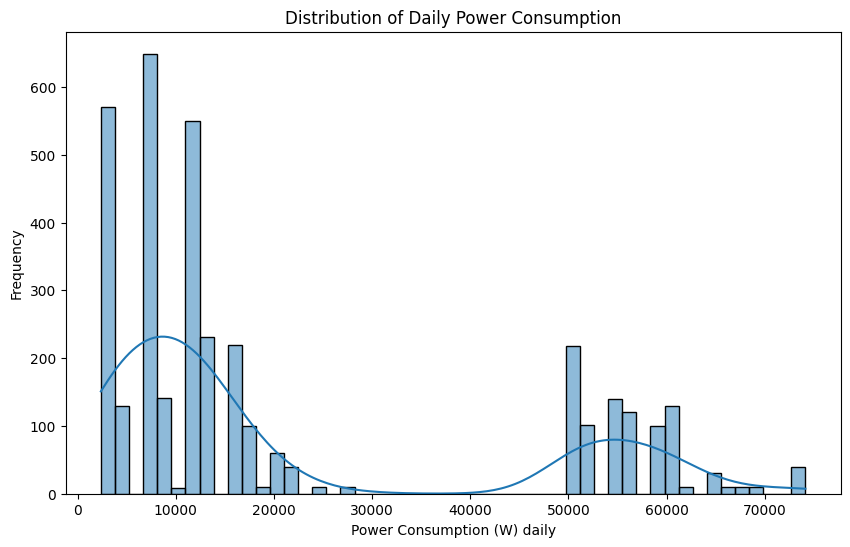

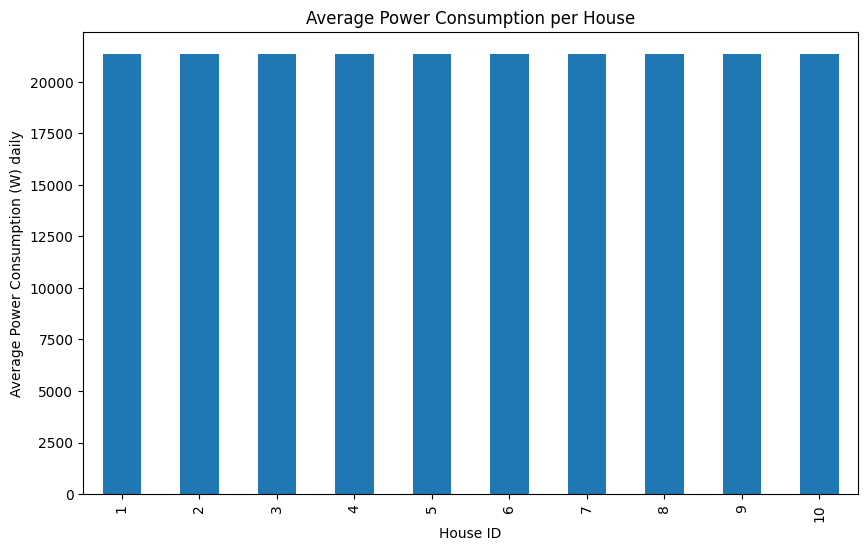

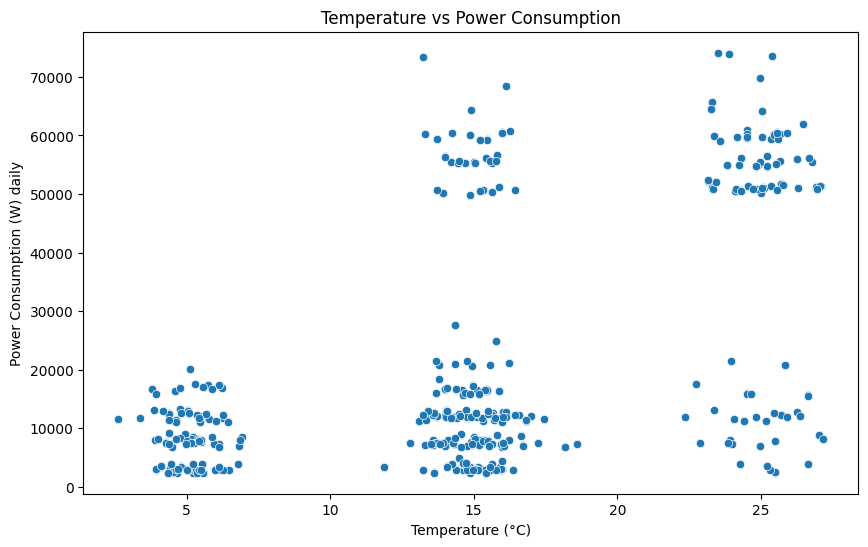

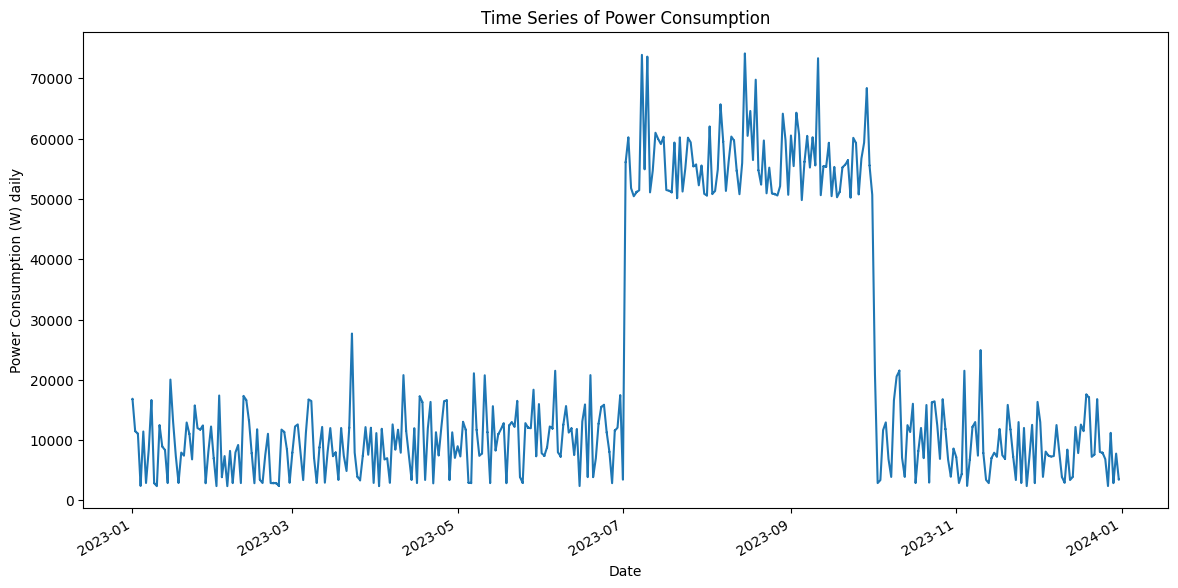

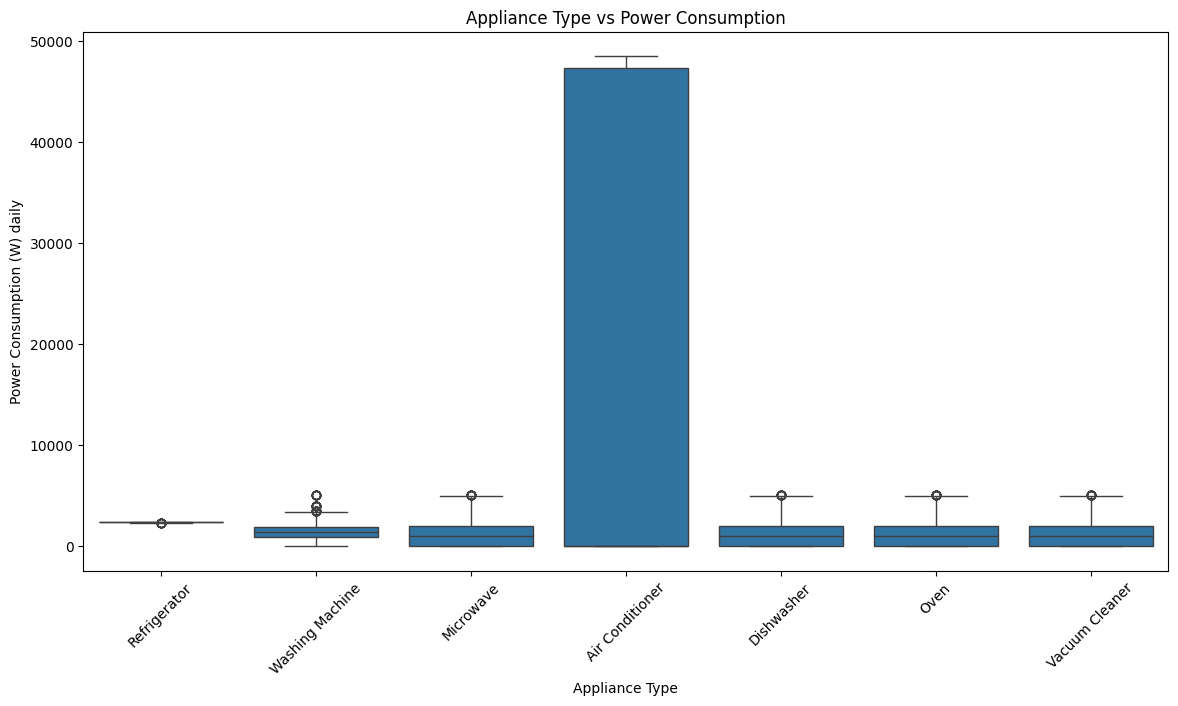

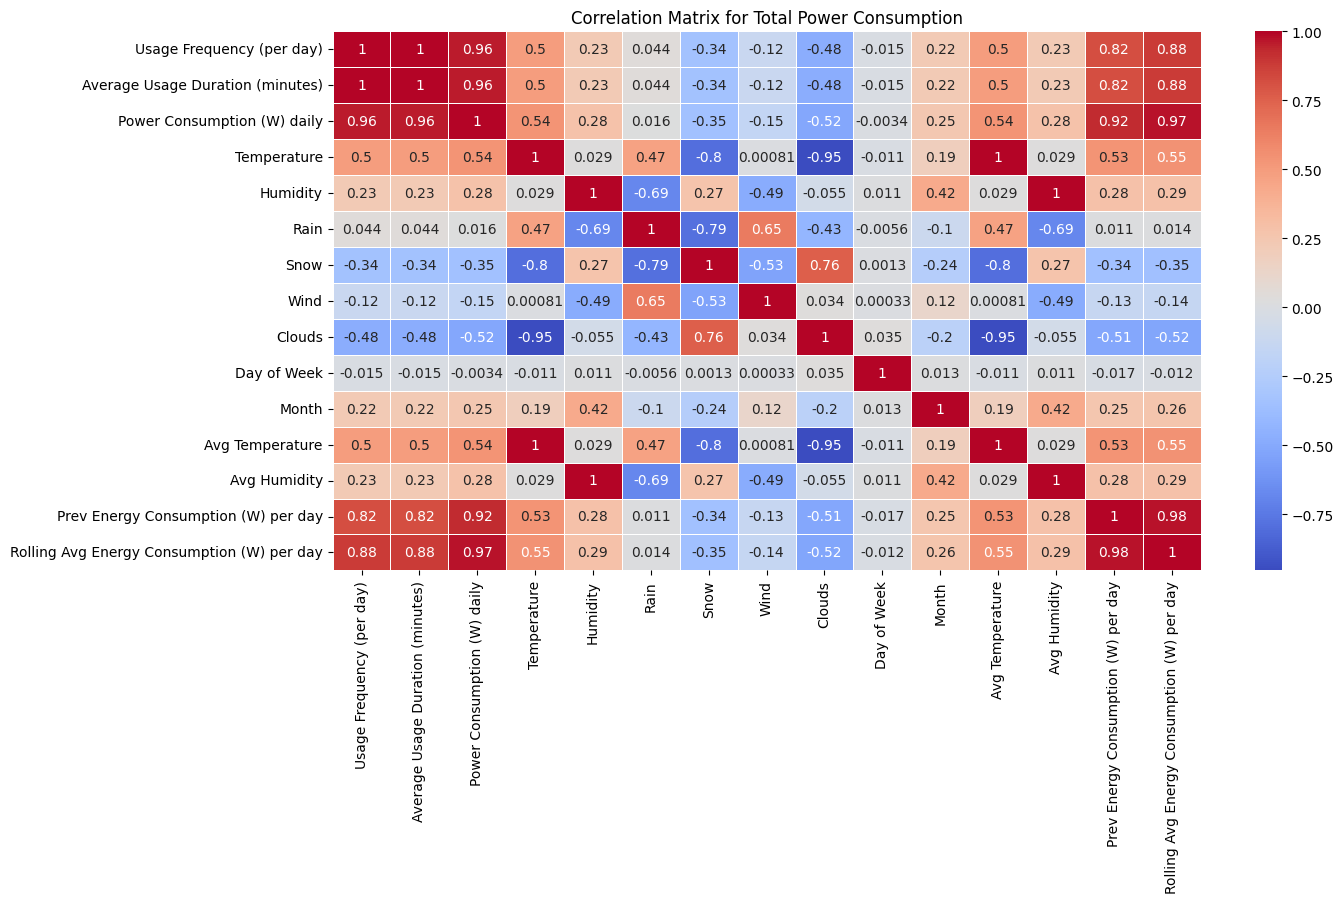

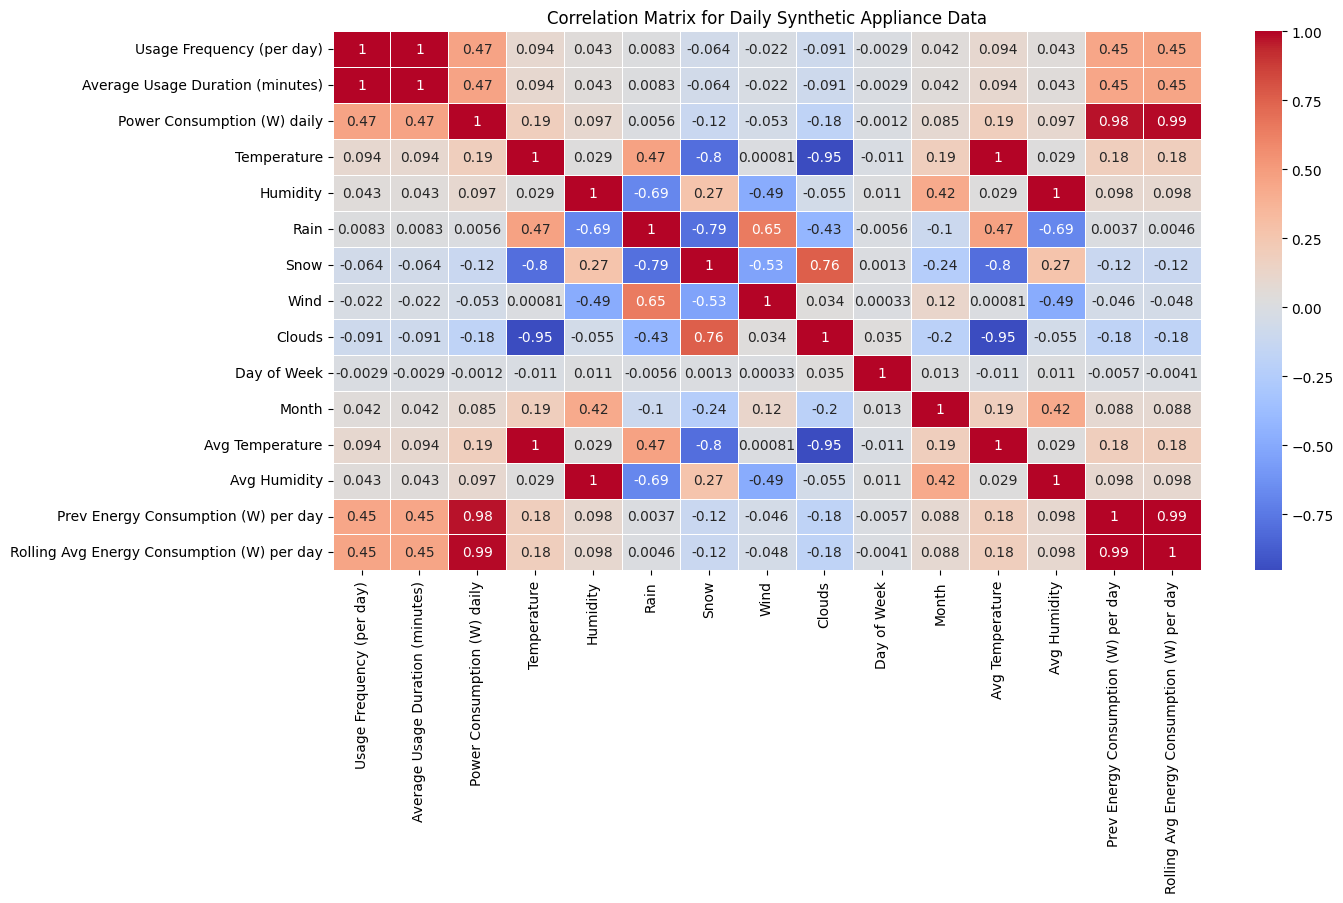


Average Power Consumption on Holidays vs Non-Holidays:
Holiday
0.0    21344.888807
Name: Power Consumption (W) daily, dtype: float64


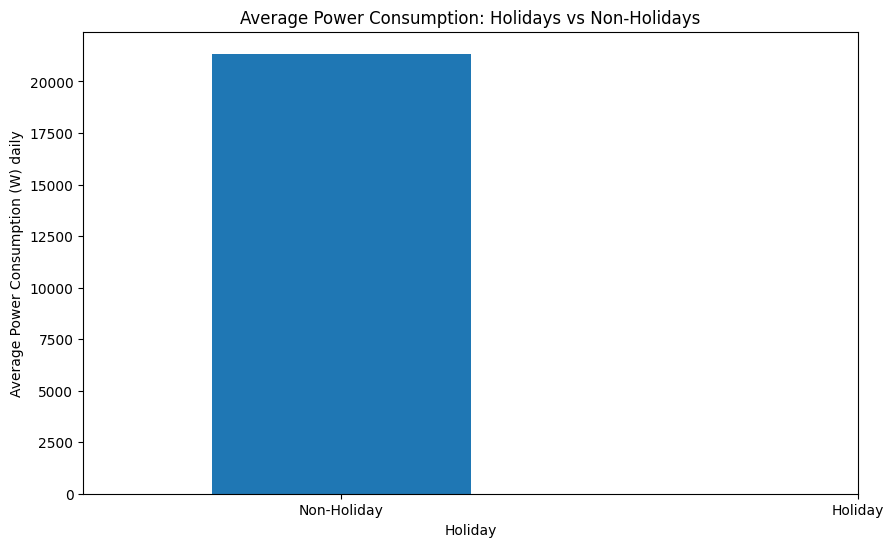

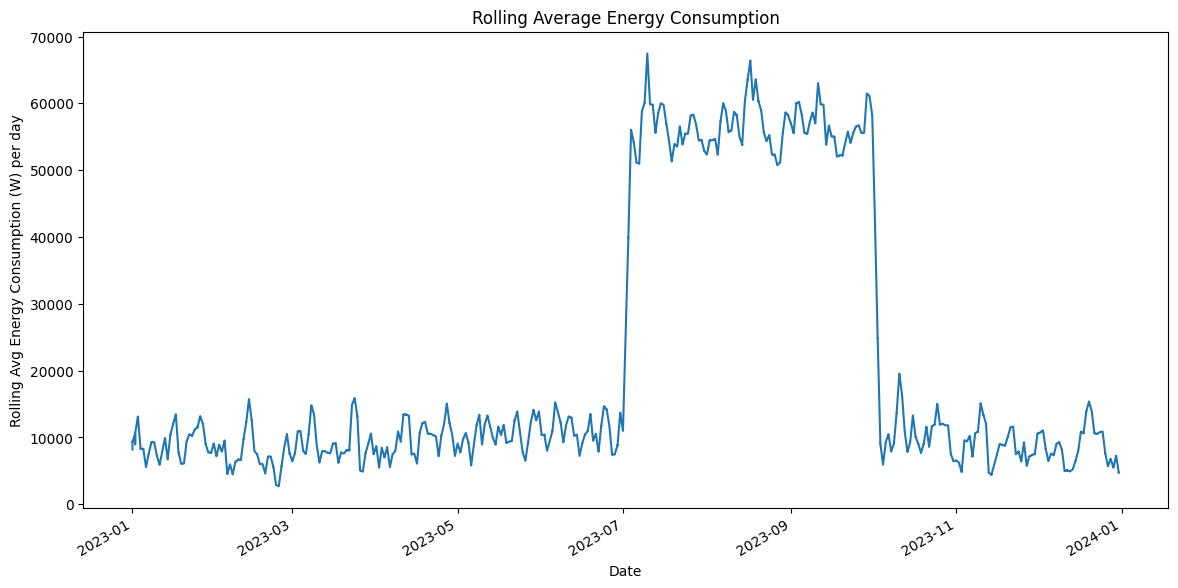


Average Power Consumption by Day of Week:
Day of Week
0.0    22309.569690
1.0    20957.888130
2.0    20828.171301
3.0    21299.691599
4.0    20990.774173
5.0    21422.518684
6.0    21600.688839
Name: Power Consumption (W) daily, dtype: float64


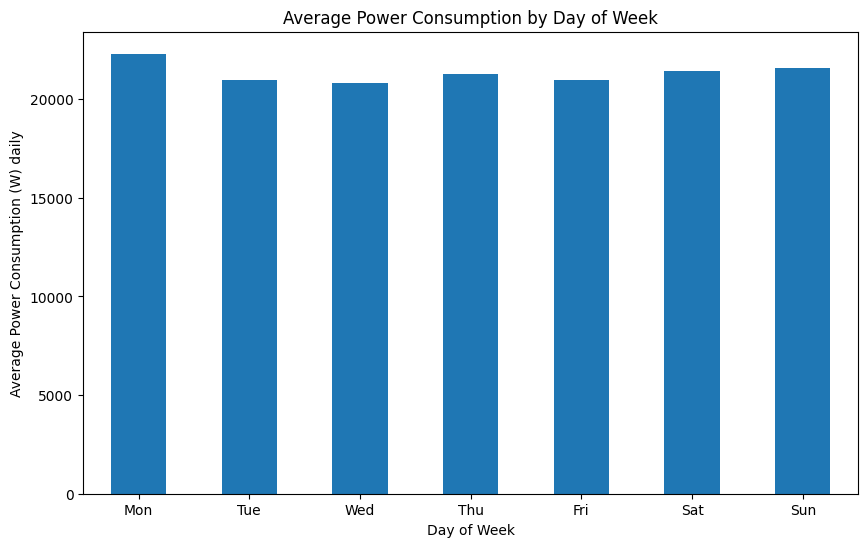

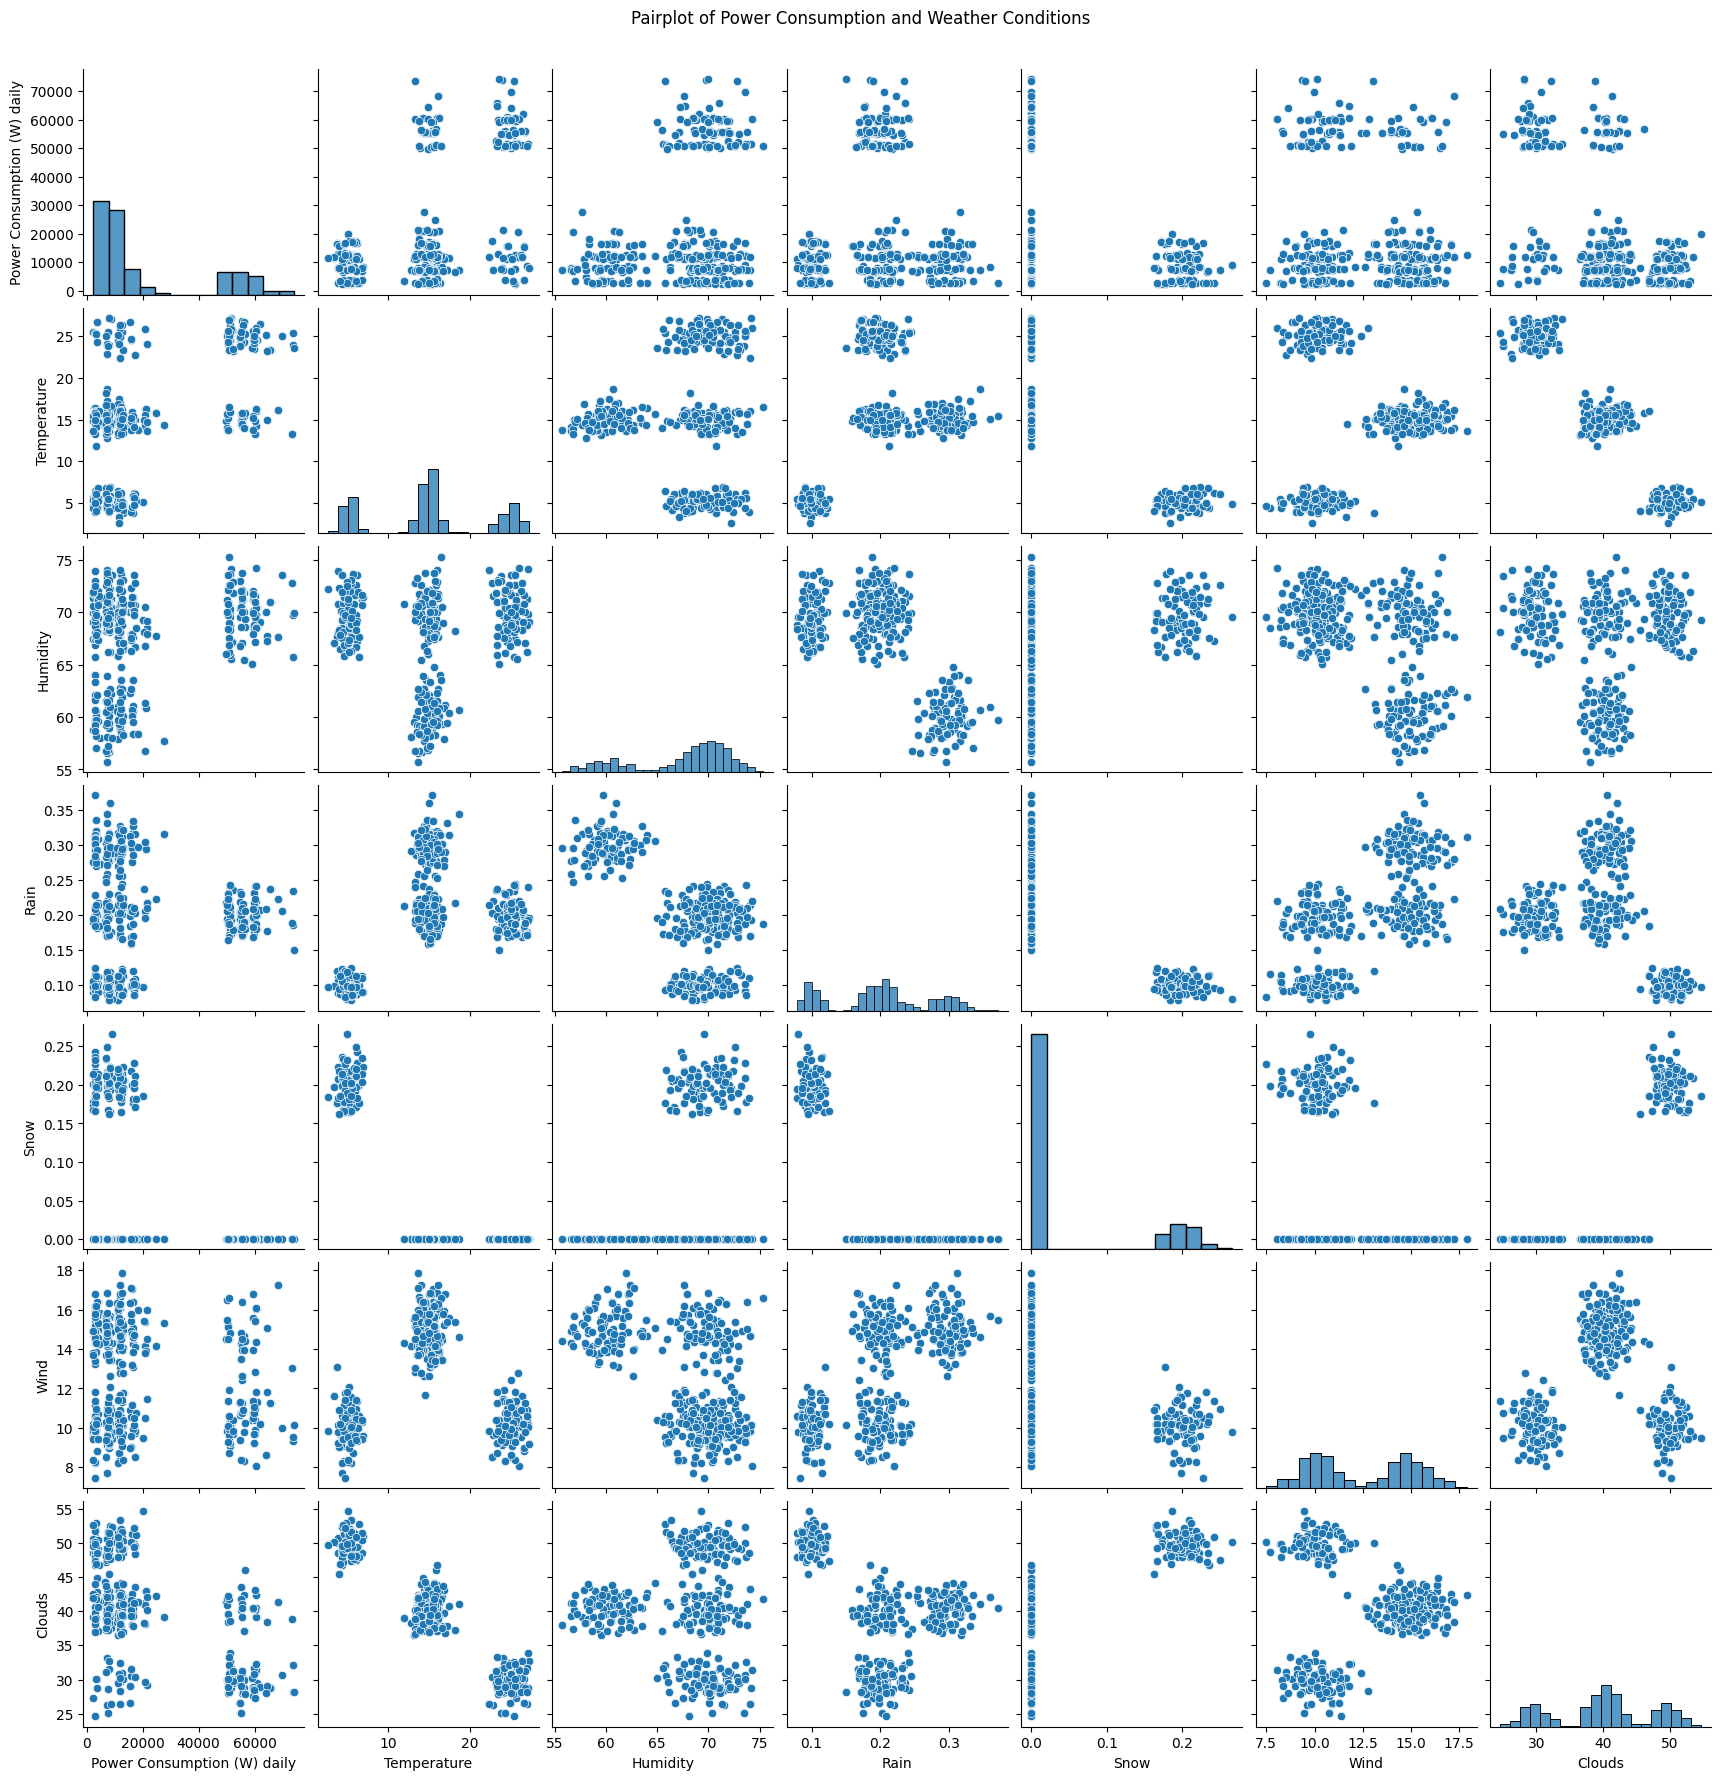

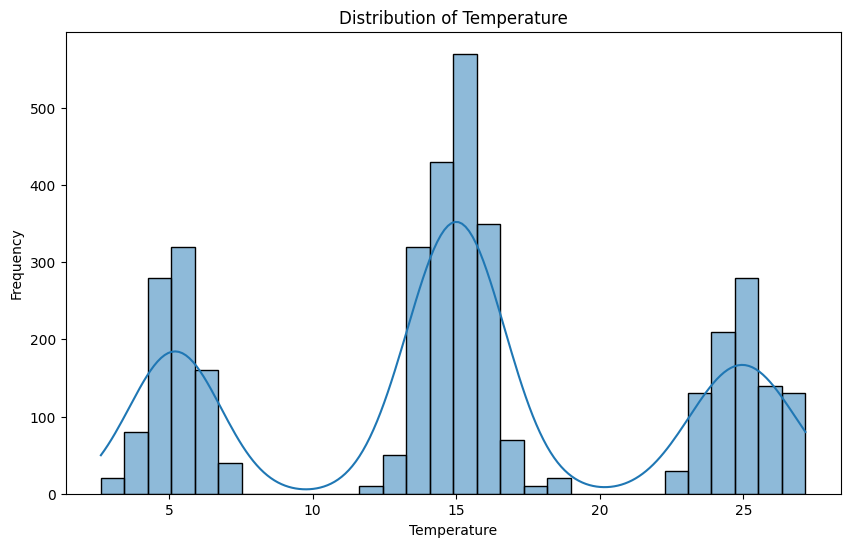

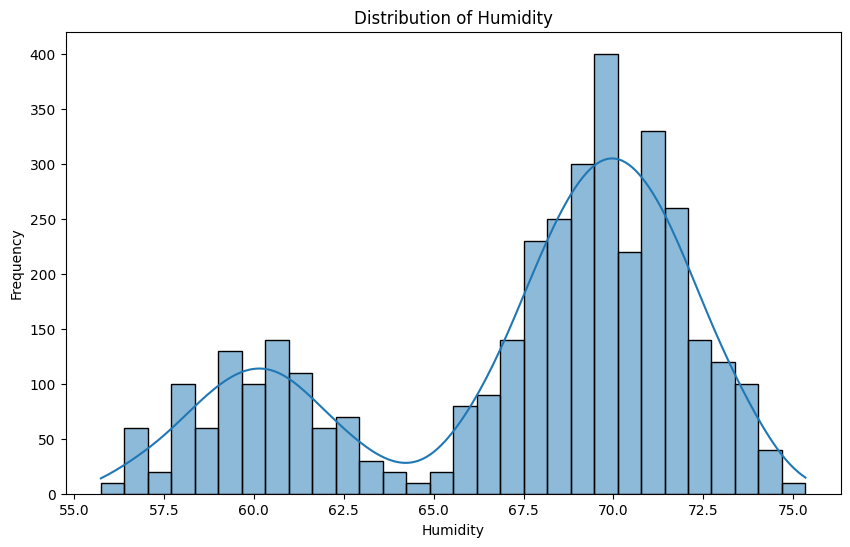

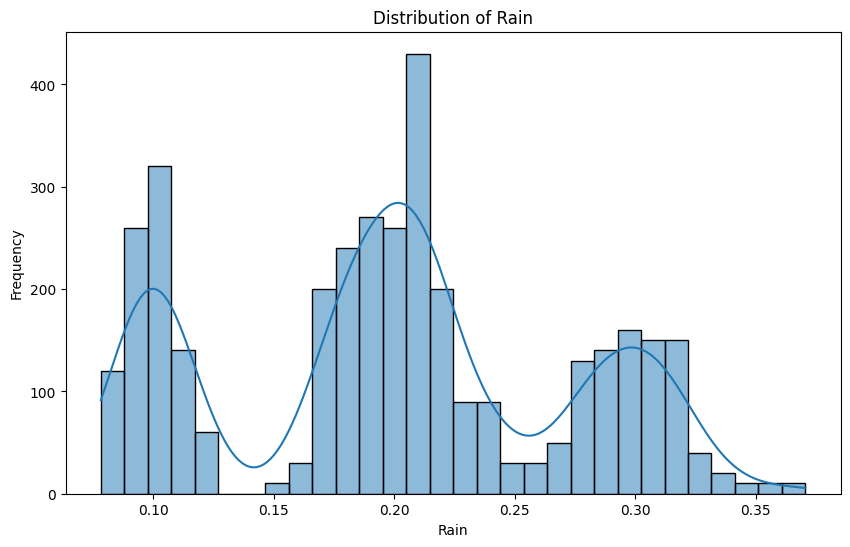

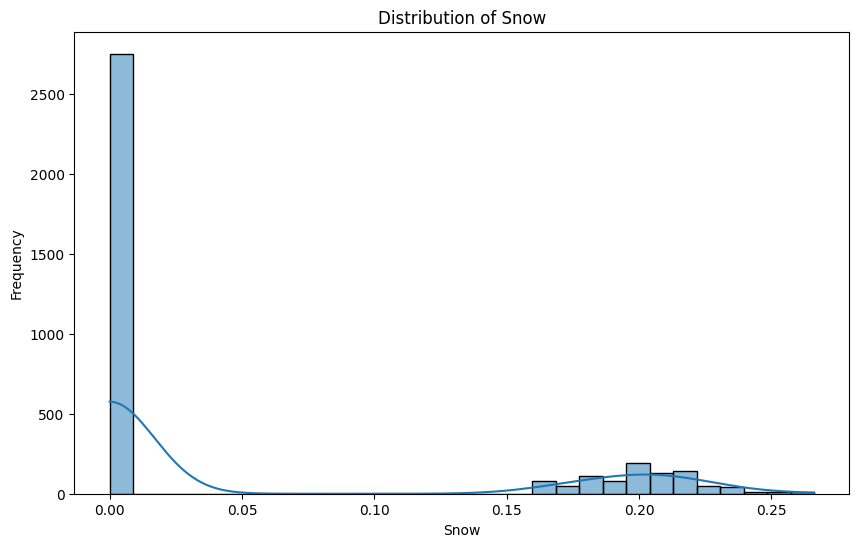

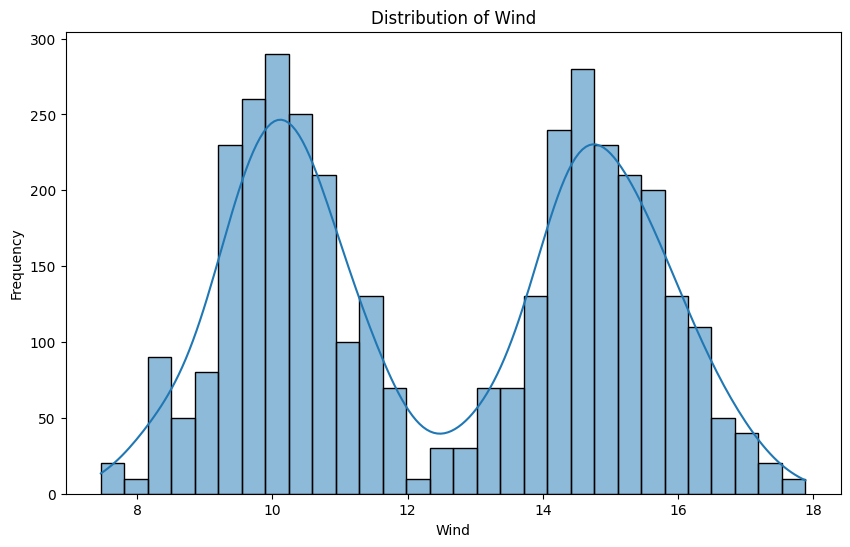

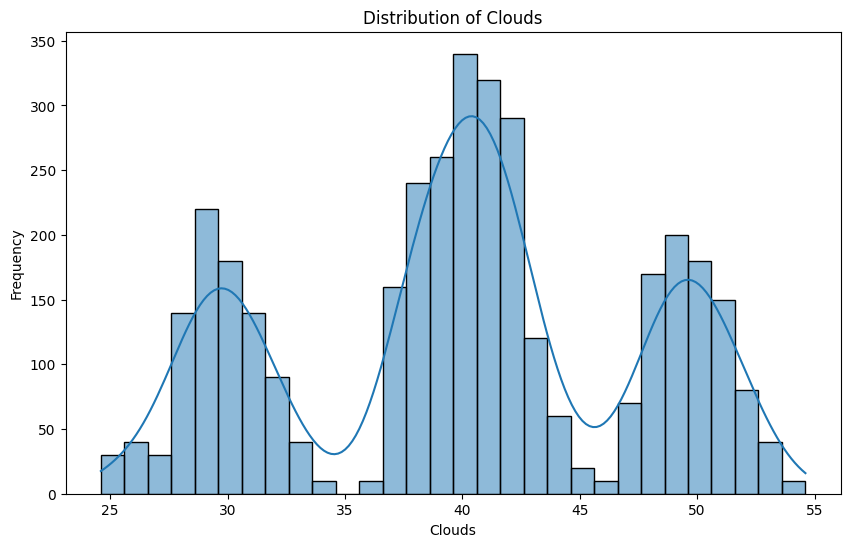

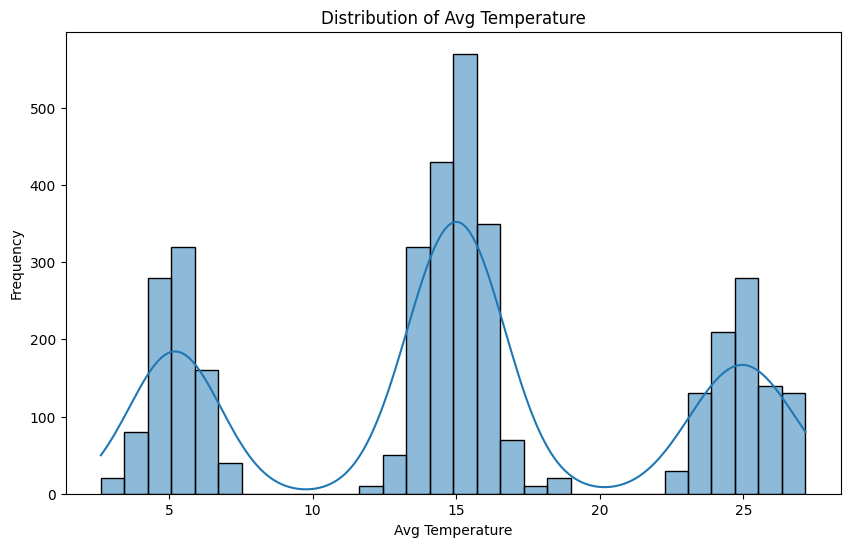

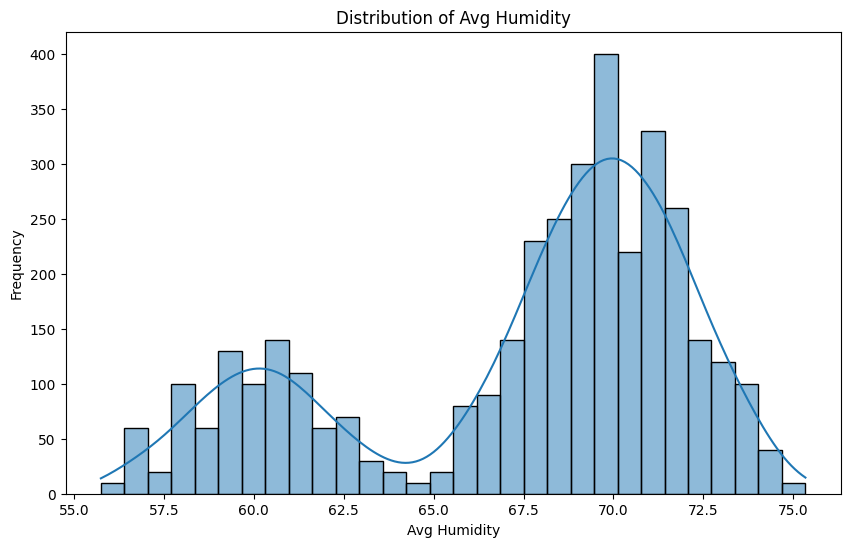


Analyzing Refrigerator:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                     3650.0   
mean      5.500000  2023-07-02 00:00:00.000000256                       24.0   
min       1.000000            2023-01-01 00:00:00                       24.0   
25%       3.000000            2023-04-02 00:00:00                       24.0   
50%       5.500000            2023-07-02 00:00:00                       24.0   
75%       8.000000            2023-10-01 00:00:00                       24.0   
max      10.000000            2023-12-31 00:00:00                       24.0   
std       2.872675                            NaN                        0.0   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                            3650.0                  3650.000000   
mean                             1440.0                  2400.040628   
min                              1440.

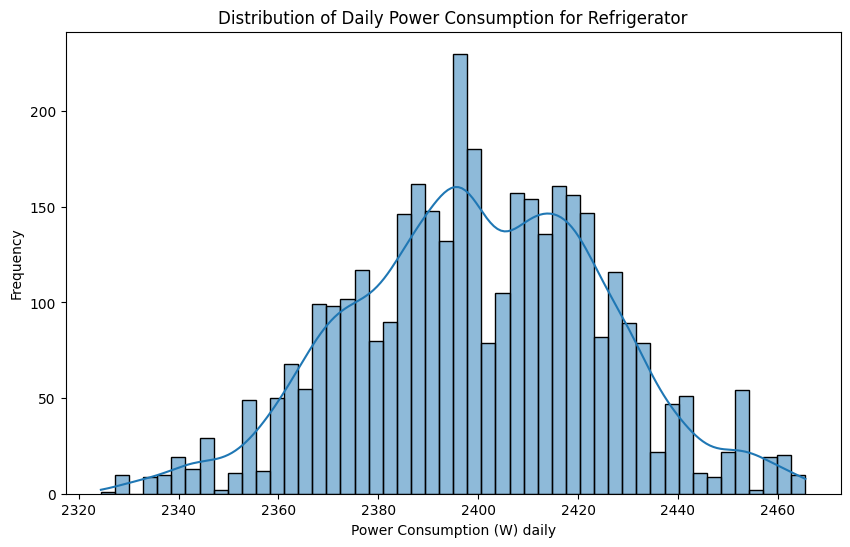

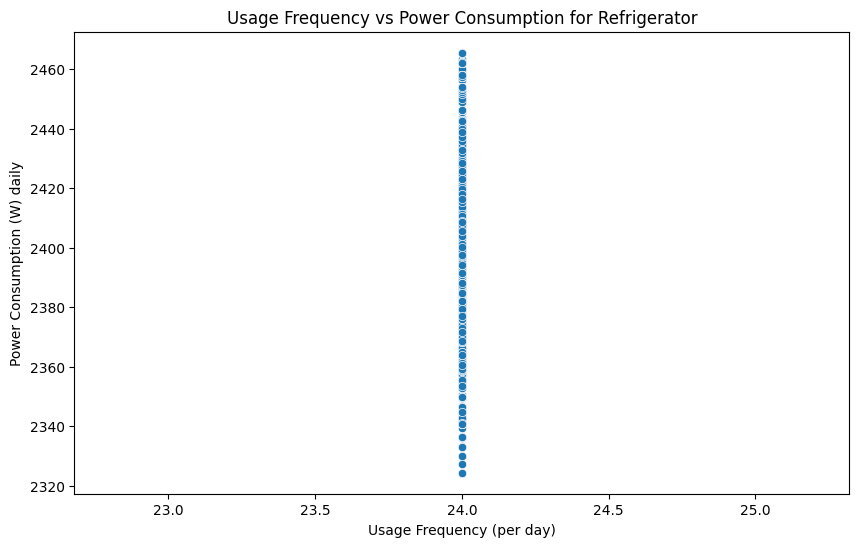

The 'Avg Usage Duration (mins)' column is missing for Refrigerator.

Analyzing Washing Machine:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   2.739726   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   2.000000   
50%       5.500000            2023-07-02 00:00:00                   3.000000   
75%       8.000000            2023-10-01 00:00:00                   4.000000   
max      10.000000            2023-12-31 00:00:00                  10.000000   
std       2.872675                            NaN                   1.606947   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                         164.383562

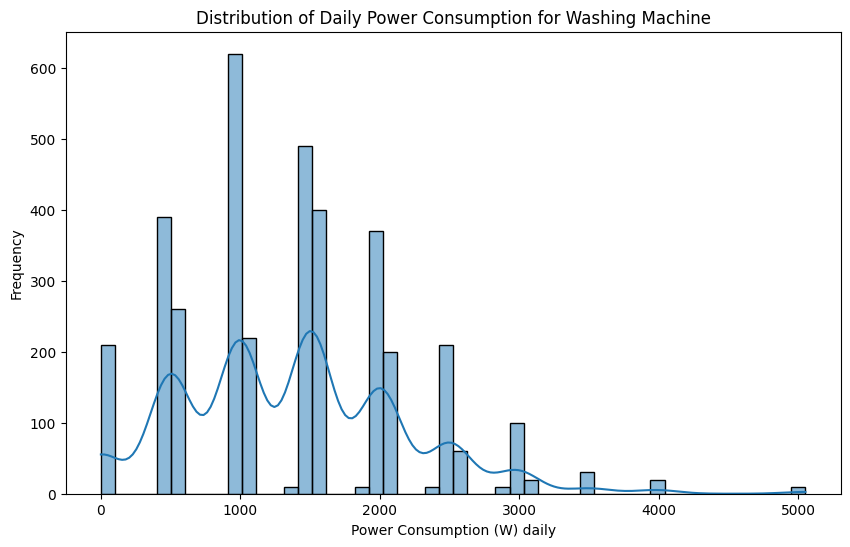

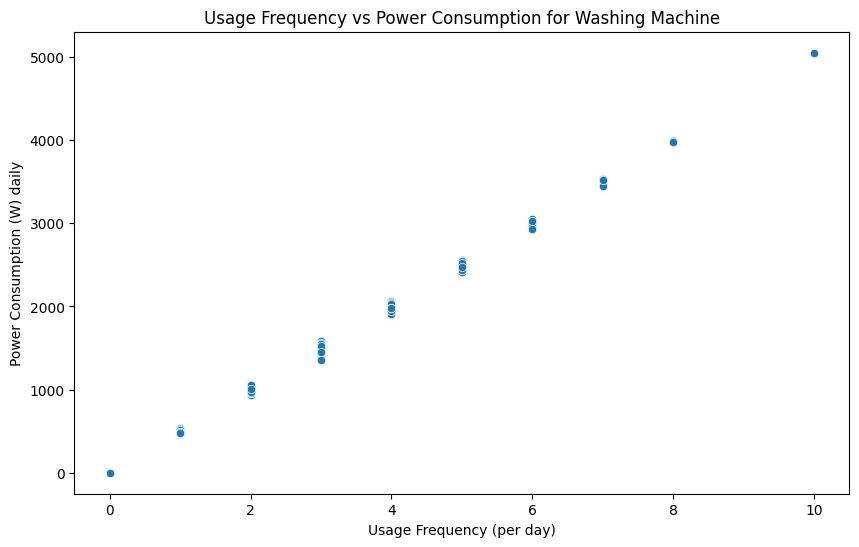

The 'Avg Usage Duration (mins)' column is missing for Washing Machine.

Analyzing Microwave:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   1.369863   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   0.000000   
50%       5.500000            2023-07-02 00:00:00                   1.000000   
75%       8.000000            2023-10-01 00:00:00                   2.000000   
max      10.000000            2023-12-31 00:00:00                   5.000000   
std       2.872675                            NaN                   1.178817   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                          82.191781   

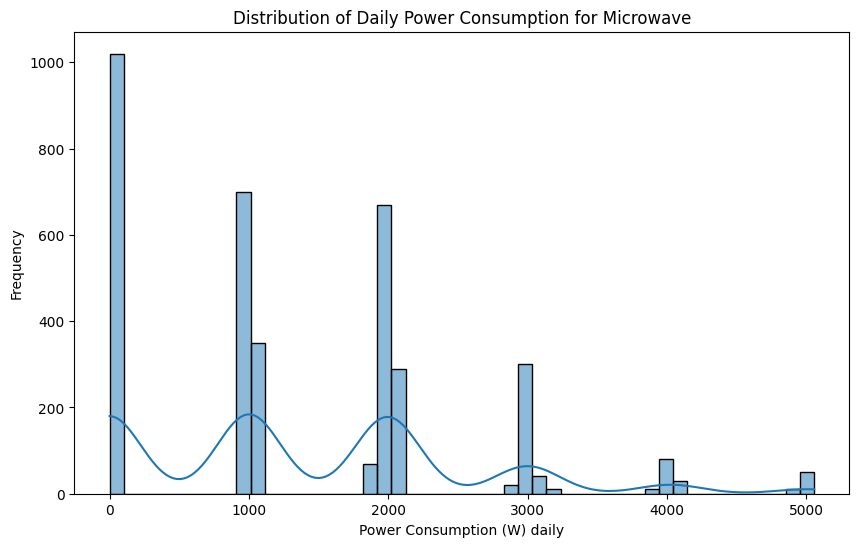

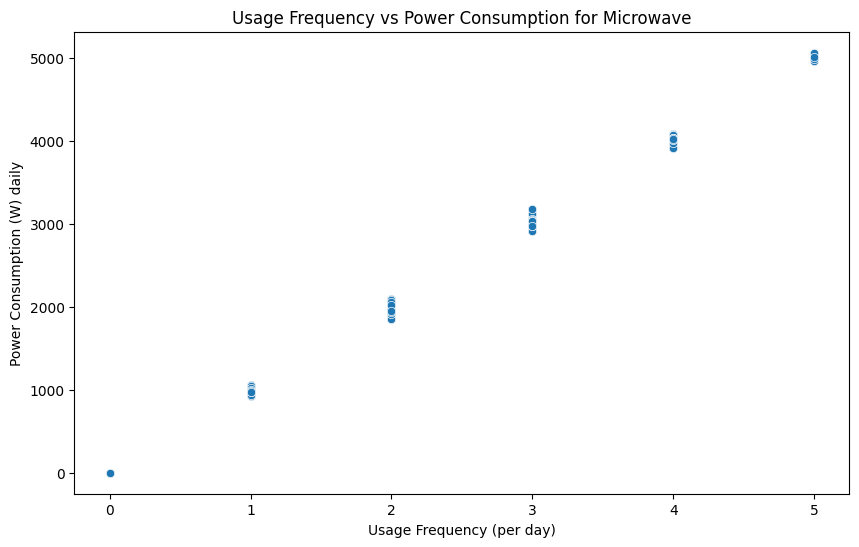

The 'Avg Usage Duration (mins)' column is missing for Microwave.

Analyzing Air Conditioner:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   6.049315   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   0.000000   
50%       5.500000            2023-07-02 00:00:00                   0.000000   
75%       8.000000            2023-10-01 00:00:00                  24.000000   
max      10.000000            2023-12-31 00:00:00                  24.000000   
std       2.872675                            NaN                  10.422049   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                         362.958904   

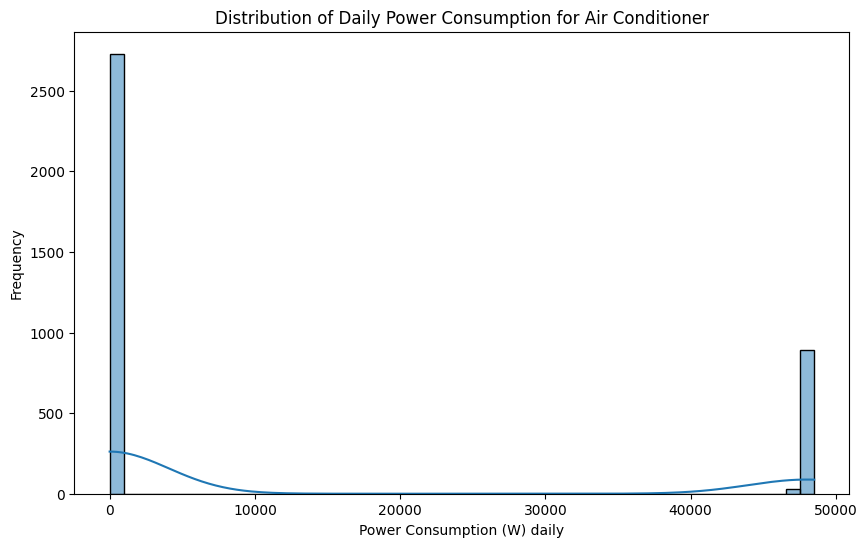

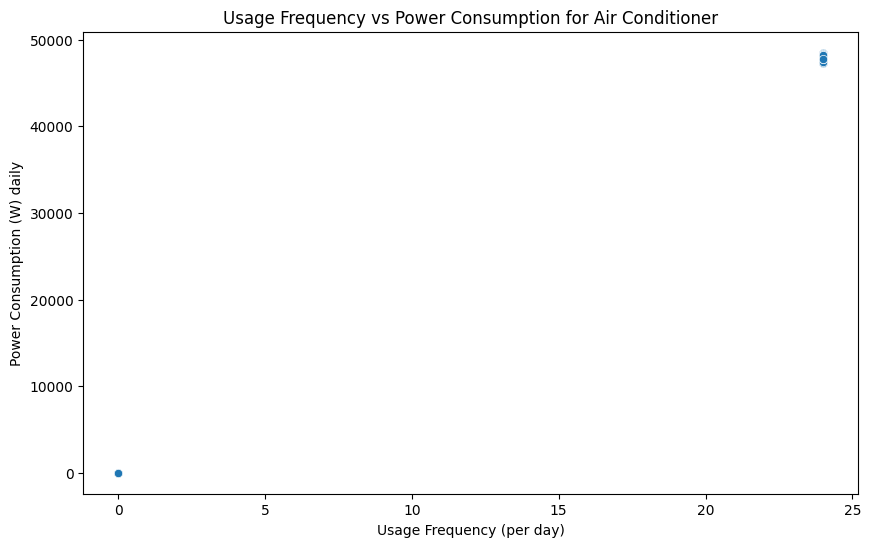

The 'Avg Usage Duration (mins)' column is missing for Air Conditioner.

Analyzing Dishwasher:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   1.369863   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   0.000000   
50%       5.500000            2023-07-02 00:00:00                   1.000000   
75%       8.000000            2023-10-01 00:00:00                   2.000000   
max      10.000000            2023-12-31 00:00:00                   5.000000   
std       2.872675                            NaN                   1.178817   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                          82.191781  

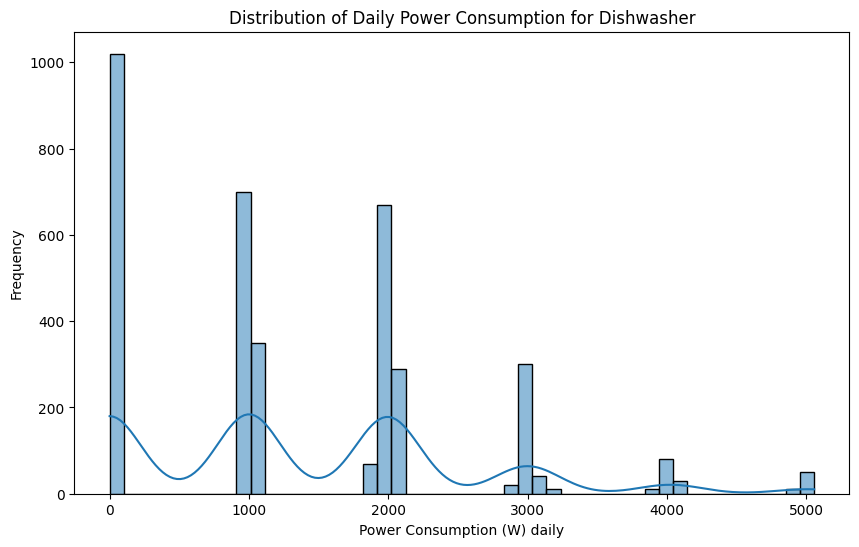

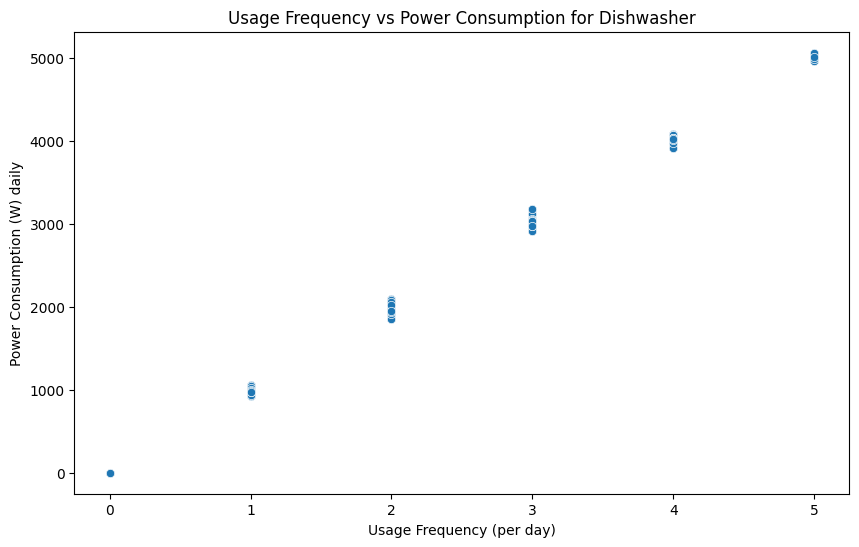

The 'Avg Usage Duration (mins)' column is missing for Dishwasher.

Analyzing Oven:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   1.369863   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   0.000000   
50%       5.500000            2023-07-02 00:00:00                   1.000000   
75%       8.000000            2023-10-01 00:00:00                   2.000000   
max      10.000000            2023-12-31 00:00:00                   5.000000   
std       2.872675                            NaN                   1.178817   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                          82.191781             

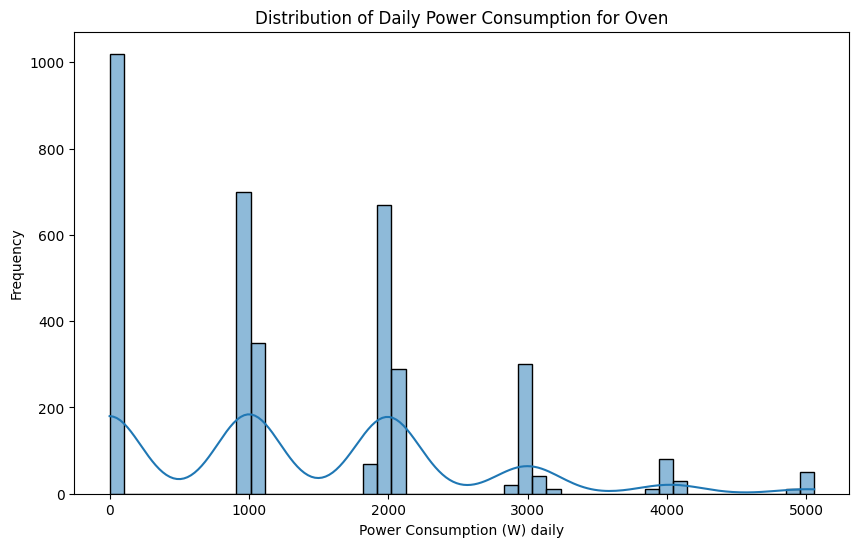

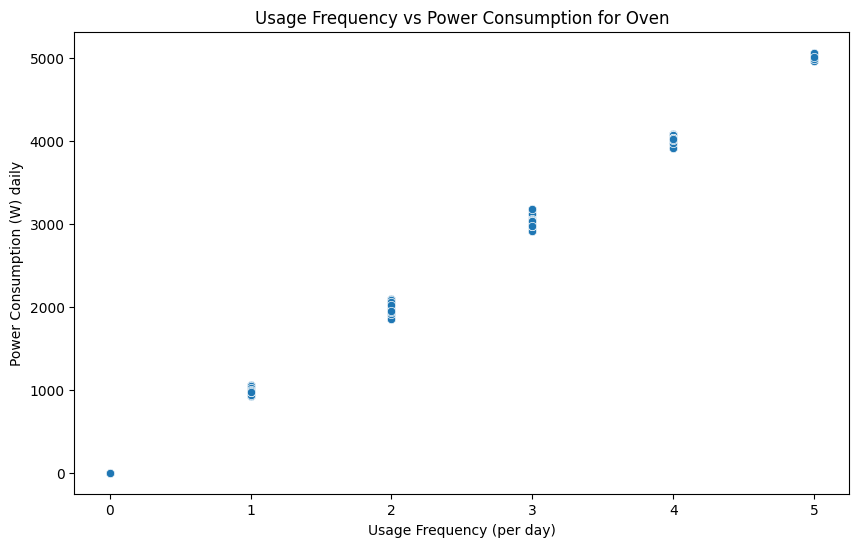

The 'Avg Usage Duration (mins)' column is missing for Oven.

Analyzing Vacuum Cleaner:
          House ID                           Date  Usage Frequency (per day)  \
count  3650.000000                           3650                3650.000000   
mean      5.500000  2023-07-02 00:00:00.000000256                   1.369863   
min       1.000000            2023-01-01 00:00:00                   0.000000   
25%       3.000000            2023-04-02 00:00:00                   0.000000   
50%       5.500000            2023-07-02 00:00:00                   1.000000   
75%       8.000000            2023-10-01 00:00:00                   2.000000   
max      10.000000            2023-12-31 00:00:00                   5.000000   
std       2.872675                            NaN                   1.178817   

       Average Usage Duration (minutes)  Power Consumption (W) daily  \
count                       3650.000000                  3650.000000   
mean                          82.191781         

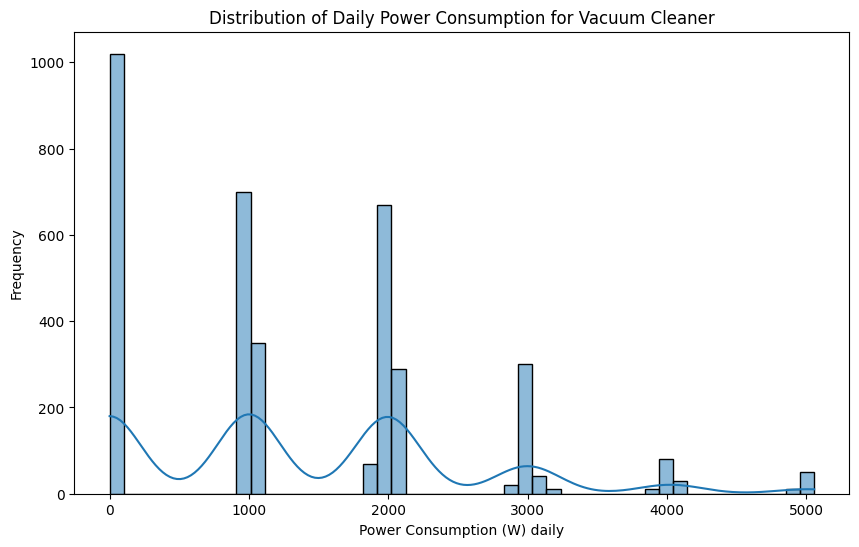

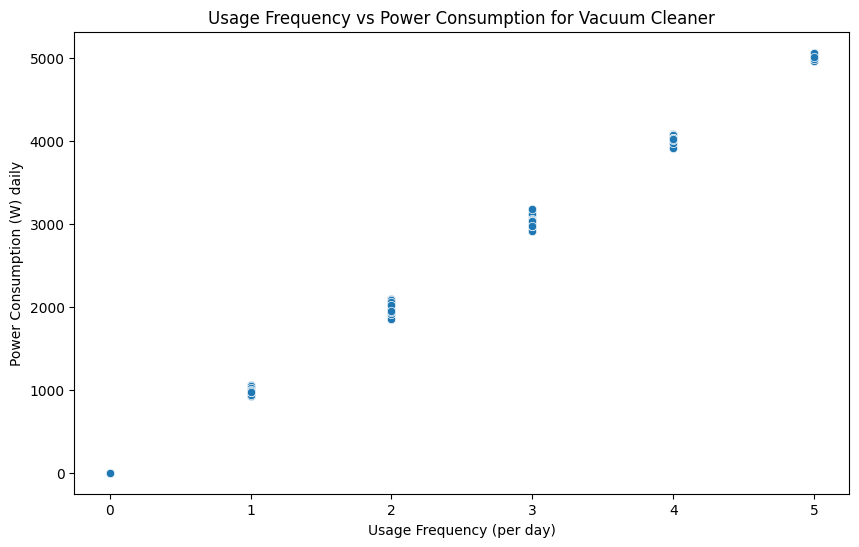

The 'Avg Usage Duration (mins)' column is missing for Vacuum Cleaner.


In [ ]:

daily_features = [
       'Usage Frequency (per day)', 'Average Usage Duration (minutes)',
       'Power Consumption (W) daily', 'Temperature', 'Humidity', 'Rain',
       'Snow', 'Wind', 'Clouds', 'Day of Week', 'Month',
       'Avg Temperature', 'Avg Humidity',
       'Prev Energy Consumption (W) per day',
       'Rolling Avg Energy Consumption (W) per day']
# Define the appliance feature separately
appliance_feature = [
       'Usage Frequency (per day)', 'Average Usage Duration (minutes)',
       'Power Consumption (W) daily', 'Temperature', 'Humidity', 'Rain',
       'Snow', 'Wind', 'Clouds', 'Day of Week', 'Month',
       'Avg Temperature', 'Avg Humidity',
       'Prev Energy Consumption (W) per day',
       'Rolling Avg Energy Consumption (W) per day', 'Appliance Type' ]

# Create an instance of DataAnalyzer
analyzer = DataAnalyzer(total_power_consumption, daily_synthetic_appliance_data, daily_features, appliance_feature)

# Perform data processing
analyzer.data_processing()

# Perform data visualization
analyzer.data_visualization()

# Analyze each appliance
analyzer.analyze_appliance()

In [ ]:


class ApplianceDataProcessor:
    def __init__(self, daily_synthetic_appliance_data, models):
        self.daily_synthetic_appliance_data = daily_synthetic_appliance_data
        self.models = models
        self.appliance_columns = {
            'Refrigerator': 'Refrigerator',
            'Washing Machine': 'Washing Machine',
            'Microwave': 'Microwave',
            'Air Conditioner': 'Air Conditioner',
            'Dishwasher': 'Dishwasher',
            'Oven': 'Oven',
            'Vacuum Cleaner': 'Vacuum Cleaner'
        }

    def sort_data_by_appliance_type(self):
        appliances = []

        for appliance, new_name in self.appliance_columns.items():
            appliance_df = self.daily_synthetic_appliance_data[self.daily_synthetic_appliance_data['Appliance Type'] == appliance]
            appliance_df = appliance_df.sort_values(by='Usage Frequency (per day)', ascending=False)
            appliance_df = appliance_df.rename(columns={
                'Usage Frequency (per day)': f'{new_name} - Usage Frequency (per day)',
                'Average Usage Duration (minutes)': f'{new_name} - Average Usage Duration (minutes)',
                'Power Consumption (W) daily': f'{new_name} - Power Consumption (W) daily',
                'Temperature': f'{new_name} - Temperature',
                'Humidity': f'{new_name} - Humidity',
                'Rain': f'{new_name} - Rain',
                'Wind': f'{new_name} - Wind',
                'Clouds': f'{new_name} - Clouds',
                'Day of Week': f'{new_name} - Day of Week',
                'Month': f'{new_name} - Month',
                'Avg Temperature': f'{new_name} - Avg Temperature',
                'Avg Humidity': f'{new_name} - Avg Humidity',
                'Prev Energy Consumption (W) per day': f'{new_name} - Prev Energy Consumption (W) per day',
                'Rolling Avg Energy Consumption (W) per day': f'{new_name} - Rolling Avg Energy Consumption (W) per day'
            })
            appliance_df.fillna(0, inplace=True)
            appliances.append(appliance_df)

        self.appliance_dfs = pd.concat(appliances)
        self.appliance_dfs.fillna(0, inplace=True)
        return self.appliance_dfs

    def daily_features_and_targets(self):
        appliance_types = list(self.appliance_columns.keys())
        daily_appliance_features = {}
        targets = {}

        for appliance in appliance_types:
            daily_appliance_features[appliance] = [
                f'{appliance} - Usage Frequency (per day)',
                f'{appliance} - Average Usage Duration (minutes)',
                f'{appliance} - Temperature',
                f'{appliance} - Humidity',
                f'{appliance} - Rain',
                f'{appliance} - Wind',
                f'{appliance} - Clouds',
                f'{appliance} - Day of Week',
                f'{appliance} - Month',
                f'{appliance} - Avg Temperature',
                f'{appliance} - Prev Energy Consumption (W) per day',
                f'{appliance} - Rolling Avg Energy Consumption (W) per day'
            ]
            targets[appliance] = f'{appliance} - Power Consumption (W) daily'

        return daily_appliance_features, targets

    def appliance_predicted(self):
        self.sort_data_by_appliance_type()
        daily_appliance_features, targets = self.daily_features_and_targets()
        appliance_types = list(self.appliance_columns.keys())

        appliances_predicted_values = {}

        for appliance in appliance_types:
            imputer = SimpleImputer(strategy='mean')
            X = self.appliance_dfs[daily_appliance_features[appliance]]
            X = X[
                (X[f'{appliance} - Usage Frequency (per day)'] != 0) |
                (X[f'{appliance} - Average Usage Duration (minutes)'] != 0) |
                (X[f'{appliance} - Temperature'] != 0) |
                (X[f'{appliance} - Humidity'] != 0) |
                (X[f'{appliance} - Rain'] != 0) |
                (X[f'{appliance} - Wind'] != 0) |
                (X[f'{appliance} - Clouds'] != 0) |
                (X[f'{appliance} - Avg Temperature'] != 0) |
                (X[f'{appliance} - Prev Energy Consumption (W) per day'] != 0) |
                (X[f'{appliance} - Rolling Avg Energy Consumption (W) per day'] != 0)
            ]

            y = self.appliance_dfs[targets[appliance]]
            y = y[y != 0]

            X_imputed = imputer.fit_transform(X)

            print("Original set shape:",  y.shape)

            for model in self.models:
                prediction = model.predict(X_imputed)
                prediction = prediction[:len(y)]
                print("Prediction set shape:", prediction.shape)
                if appliance != 'Air Conditioner':
                    prediction = prediction / 5
                    appliances_predicted_values[appliance] = {
                        'original': y,
                        'predicted': prediction

                    }

                appliances_predicted_values[appliance] = {
                      'original': y,
                      'predicted': prediction
                }

        return appliances_predicted_values

    def analyze_predictions(self, appliances_predicted_values):
        analysis_results = {}

        # Iterate over each appliance
        for appliance, values in appliances_predicted_values.items():
            original = values['original']
            predicted = values['predicted']

            # Perform analysis
            mae = mean_absolute_error(original, predicted)
            mse = mean_squared_error(original, predicted)
            r2 = r2_score(original, predicted)

            analysis_results[appliance] = {
                'MAE': mae,
                'MSE': mse,
                'R²': r2
            }

        return analysis_results


    def plot_predictions(self, appliances_predicted_values):
        for appliance, values in appliances_predicted_values.items():
            original = values['original']
            predicted = values['predicted']

            # Create a new figure for each appliance
            fig, axs = plt.subplots(2, 2, figsize=(14, 14))

            # Plot Original vs Predicted Power Consumption
            axs[0, 0].bar(['Original', 'Predicted'], [original.mean(), predicted.mean()], color=['blue', 'red'])
            axs[0, 0].set_title(f'{appliance} - Original vs Predicted Power Consumption')
            axs[0, 0].set_ylabel('Power Consumption (W)')

            # Plot Scatter Plot of Predictions
            axs[0, 1].scatter(original, predicted, alpha=0.5)
            axs[0, 1].plot([original.min(), original.max()], [original.min(), original.max()], 'k--', lw=2)
            axs[0, 1].set_title(f'{appliance} - Scatter Plot of Predictions')
            axs[0, 1].set_xlabel('Original Power Consumption (W)')
            axs[0, 1].set_ylabel('Predicted Power Consumption (W)')

            # Plot Residual Plot
            residuals = original - predicted
            axs[1, 0].bar(range(len(residuals)), residuals, color='green')
            axs[1, 0].axhline(0, color='black', linestyle='--')
            axs[1, 0].set_title(f'{appliance} - Residual Plot')
            axs[1, 0].set_xlabel('Time')
            axs[1, 0].set_ylabel('Residuals (W)')

            # Plot Histogram of Prediction Errors
            axs[1, 1].hist(residuals, bins=50, color='purple', alpha=0.7)
            axs[1, 1].set_title(f'{appliance} - Histogram of Prediction Errors')
            axs[1, 1].set_xlabel('Error (W)')
            axs[1, 1].set_ylabel('Frequency')

            # Adjust layout
            plt.tight_layout()

            # Show the plots
            plt.show()


# **ApplianceDataProcessor Class: Step-by-Step Explanation**

## Introduction
The `ApplianceDataProcessor` class processes and analyzes daily synthetic appliance data. It sorts, prepares, and predicts power consumption for various appliance types using machine learning models, and then evaluates the predictions.

### Initialization
The class is initialized with two main inputs:
1. `daily_synthetic_appliance_data`: A DataFrame containing synthetic data on daily appliance usage.
2. `models`: A list of machine learning models used for predicting power consumption.

It also defines a dictionary mapping appliance types to their respective column names in the DataFrame.

### Method: `sort_data_by_appliance_type`
This method sorts and renames columns for each appliance type, creating a unified DataFrame with standardized column names. It includes:

1. **Filtering Data by Appliance Type**: For each appliance type, filter the DataFrame to get rows corresponding to that appliance.
2. **Sorting by Usage Frequency**: Sort the filtered DataFrame by usage frequency in descending order.
3. **Renaming Columns**: Rename the columns to include the appliance type in their names.
4. **Handling Missing Values**: Fill missing values with zero.
5. **Combining DataFrames**: Concatenate all the appliance-specific DataFrames into one unified DataFrame.

### Method: `daily_features_and_targets`
This method prepares the feature and target columns for each appliance type. It includes:

1. **Defining Feature Columns**: For each appliance type, define the relevant feature columns by appending the appliance type to standard feature names.
2. **Defining Target Columns**: Define the target column for each appliance type as the daily power consumption.

### Method: `appliance_predicted`
This method predicts power consumption for each appliance type using the provided models. It includes:

1. **Sorting and Preparing Data**: Call `sort_data_by_appliance_type` to get the sorted and standardized DataFrame.
2. **Getting Features and Targets**: Call `daily_features_and_targets` to get the feature and target columns.
3. **Predicting Power Consumption**: For each appliance type, predict power consumption using each model:
   - **Handling Missing Values**: Use `SimpleImputer` to fill missing values in the feature columns.
   - **Filtering Zero Values**: Filter out rows with zero values in the feature columns.
   - **Imputing Features**: Transform the feature columns to handle missing values.
   - **Predicting with Models**: Use each model to predict power consumption.
   - **Adjusting Predictions**: For appliances other than 'Air Conditioner', divide predictions by 5.
4. **Storing Predictions**: Store the original and predicted values for each appliance type.

### Method: `analyze_predictions`
This method analyzes the predictions by calculating evaluation metrics. It includes:

1. **Calculating Metrics**: For each appliance type, calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) between original and predicted values.
2. **Storing Results**: Store the evaluation metrics for each appliance type.

### Method: `plot_predictions`
This method visualizes the predictions using various plots. It includes:

1. **Original vs Predicted Power Consumption**: A bar plot comparing the mean original and predicted power consumption.
2. **Scatter Plot of Predictions**: A scatter plot comparing original and predicted power consumption.
3. **Residual Plot**: A bar plot of the residuals (differences between original and predicted values) over time.
4. **Histogram of Prediction Errors**: A histogram showing the distribution of prediction errors.

### Example Usage
To use the `ApplianceDataProcessor` class:
1. **Initialize Class**: Create an instance of `ApplianceDataProcessor` with the appropriate data inputs and machine learning models.
2. **Sort and Prepare Data**: Call `sort_data_by_appliance_type` to prepare the data.
3. **Predict Power Consumption**: Use `appliance_predicted` to get the predicted values.
4. **Analyze Predictions**: Call `analyze_predictions` to evaluate the predictions.
5. **Visualize Predictions**: Use `plot_predictions` to generate visualizations of the predictions.

---

This detailed explanation provides an overview of the `ApplianceDataProcessor` class's structure and functionality, highlighting the purpose and operation of each method within the class.


       Refrigerator - Usage Frequency (per day)  \
count                              25550.000000   
mean                                   3.428571   
std                                    8.398415   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                   24.000000   

       Refrigerator - Average Usage Duration (minutes)  \
count                                     25550.000000   
mean                                        205.714286   
std                                         503.904894   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                        1440.000000   

       Refrigerat

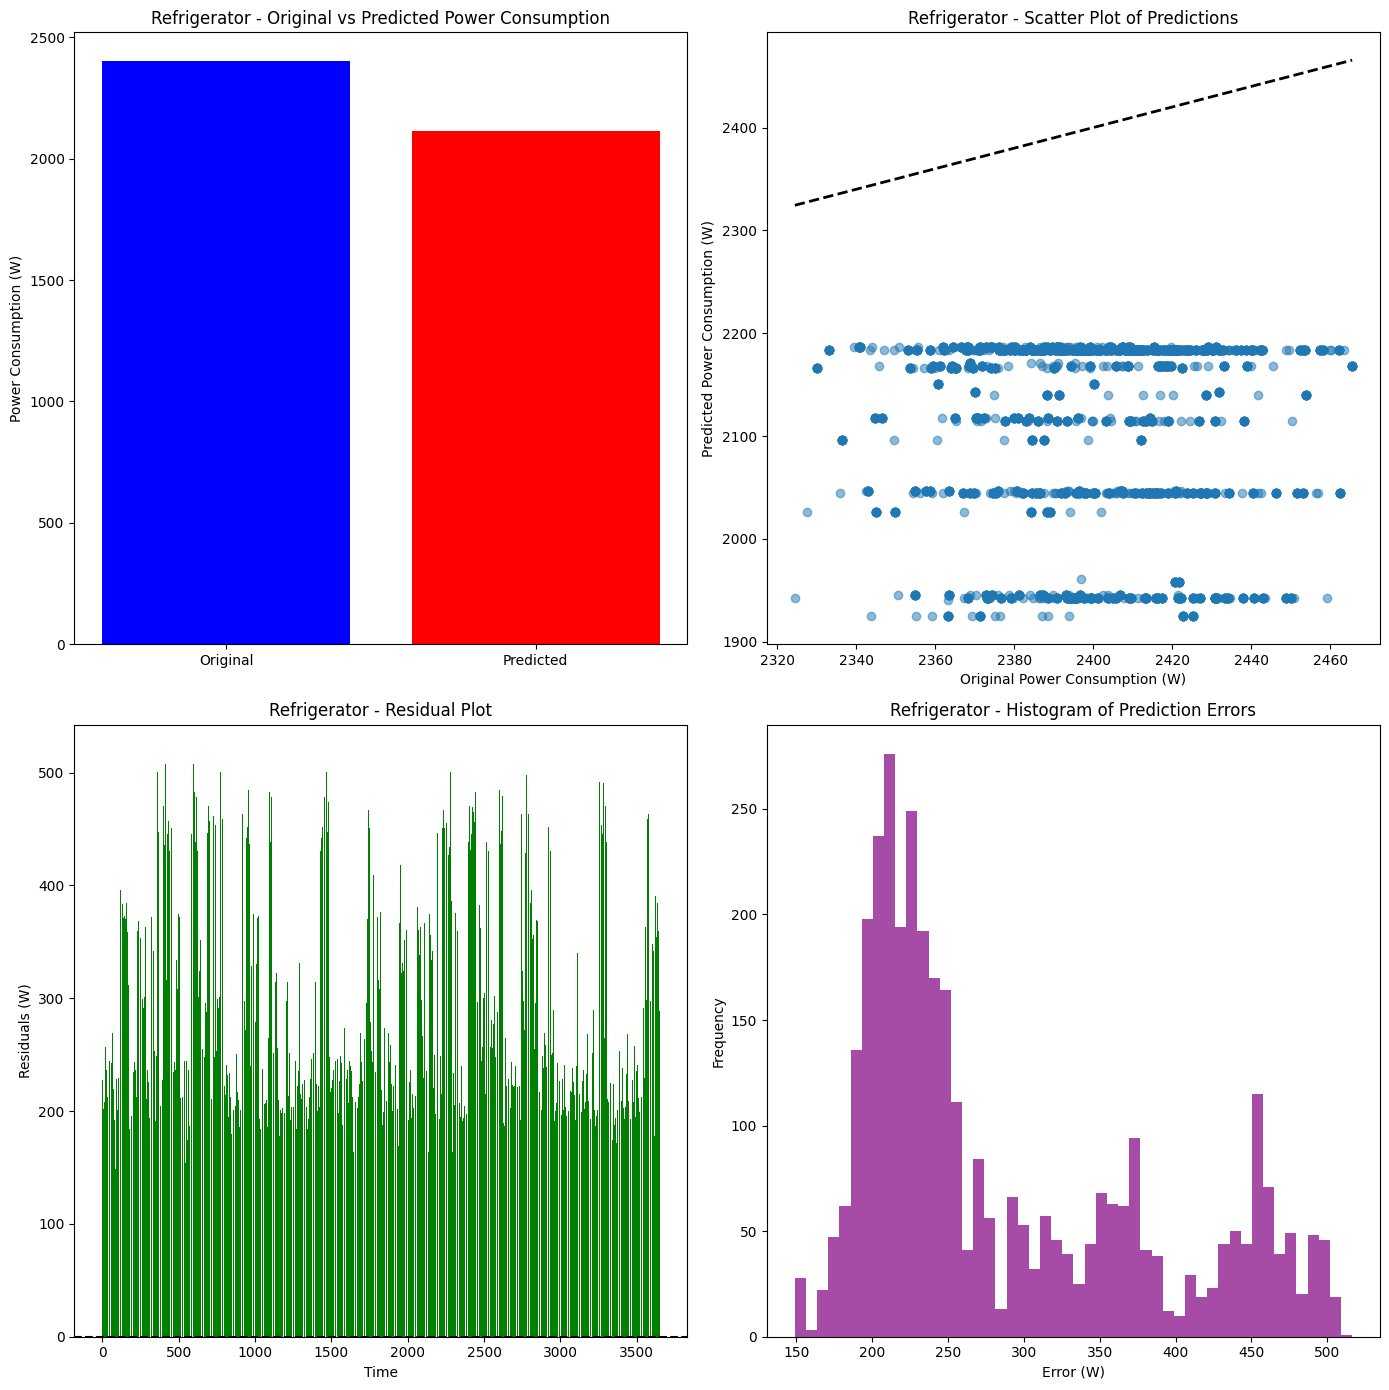

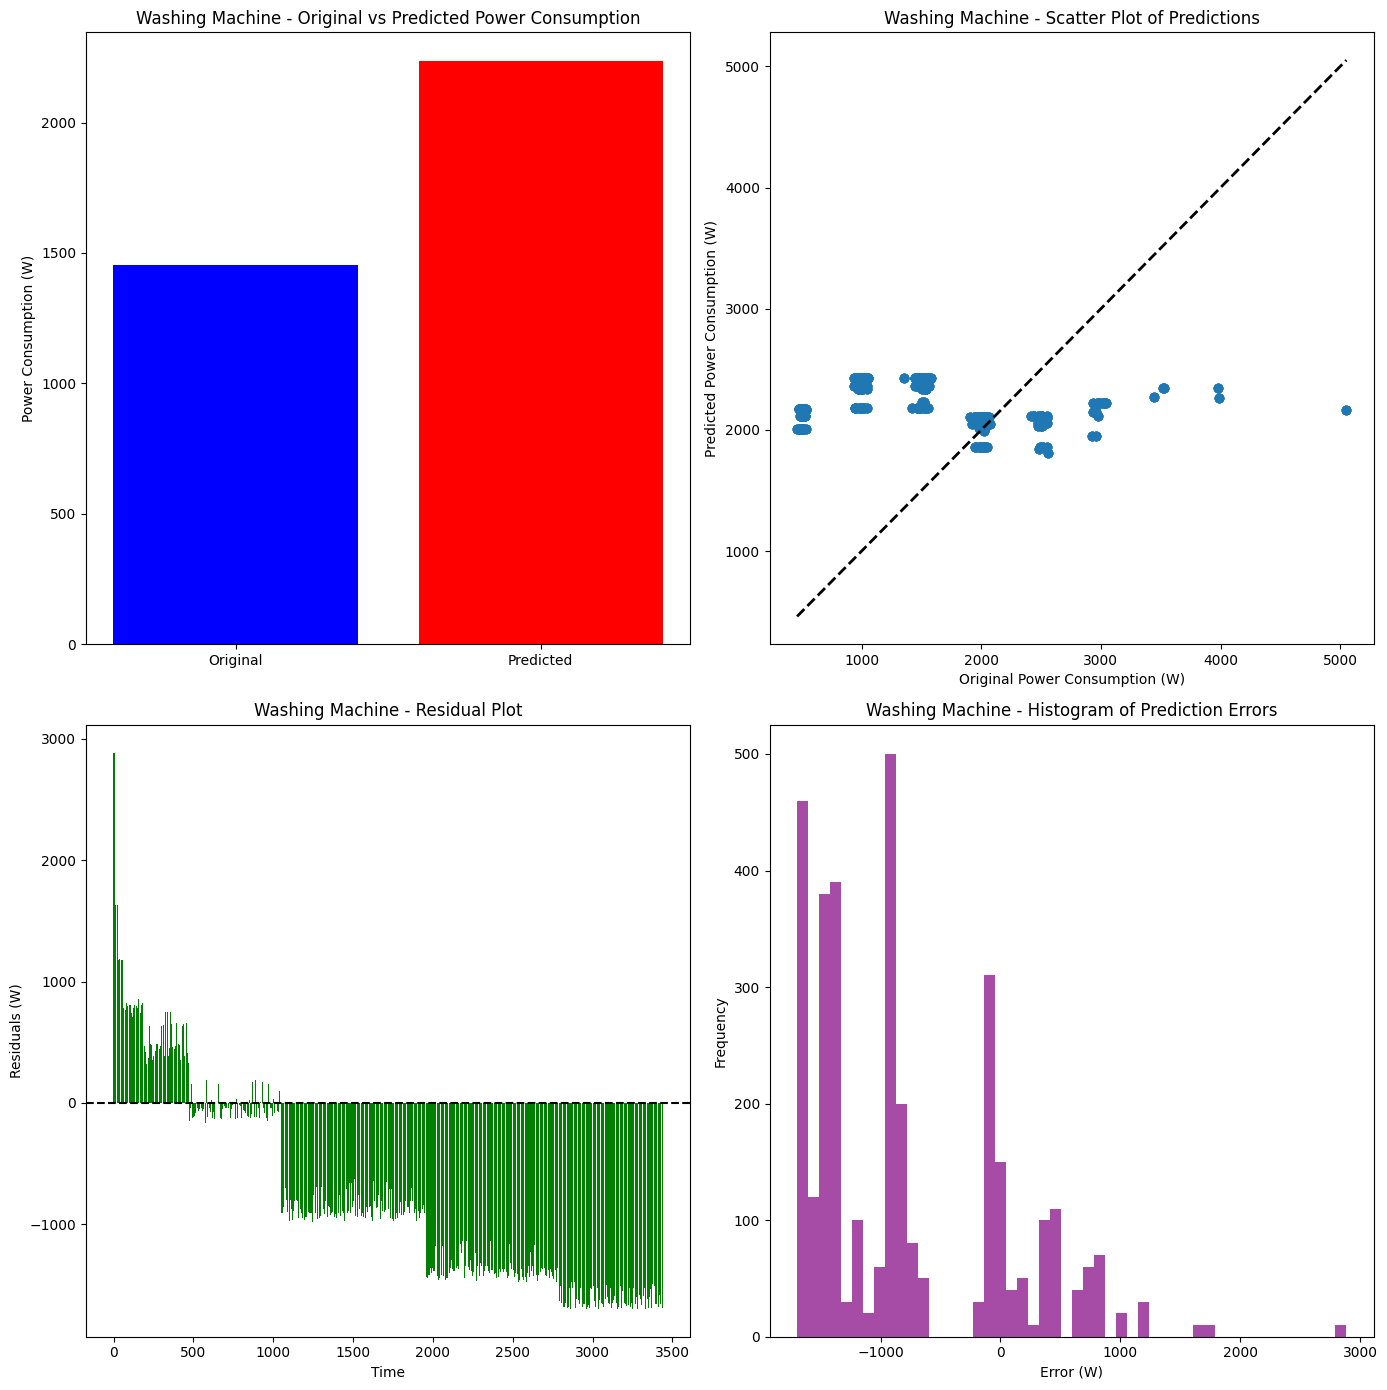

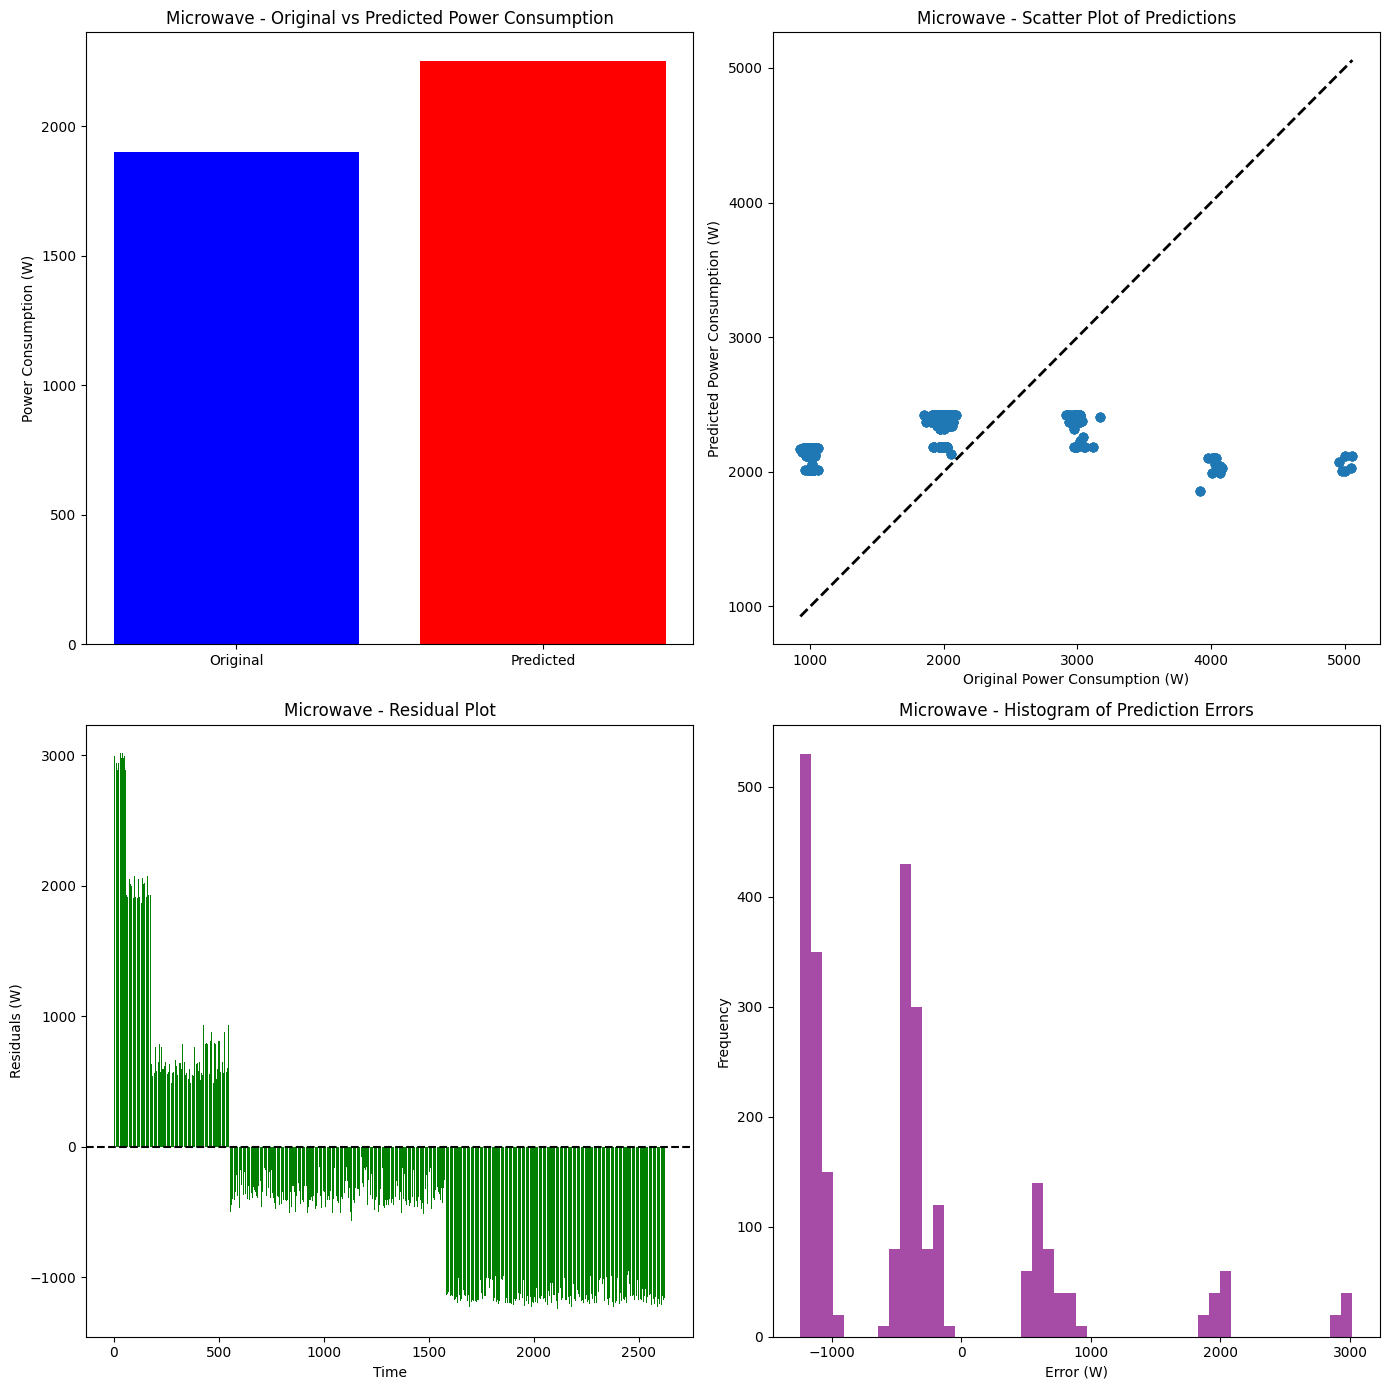

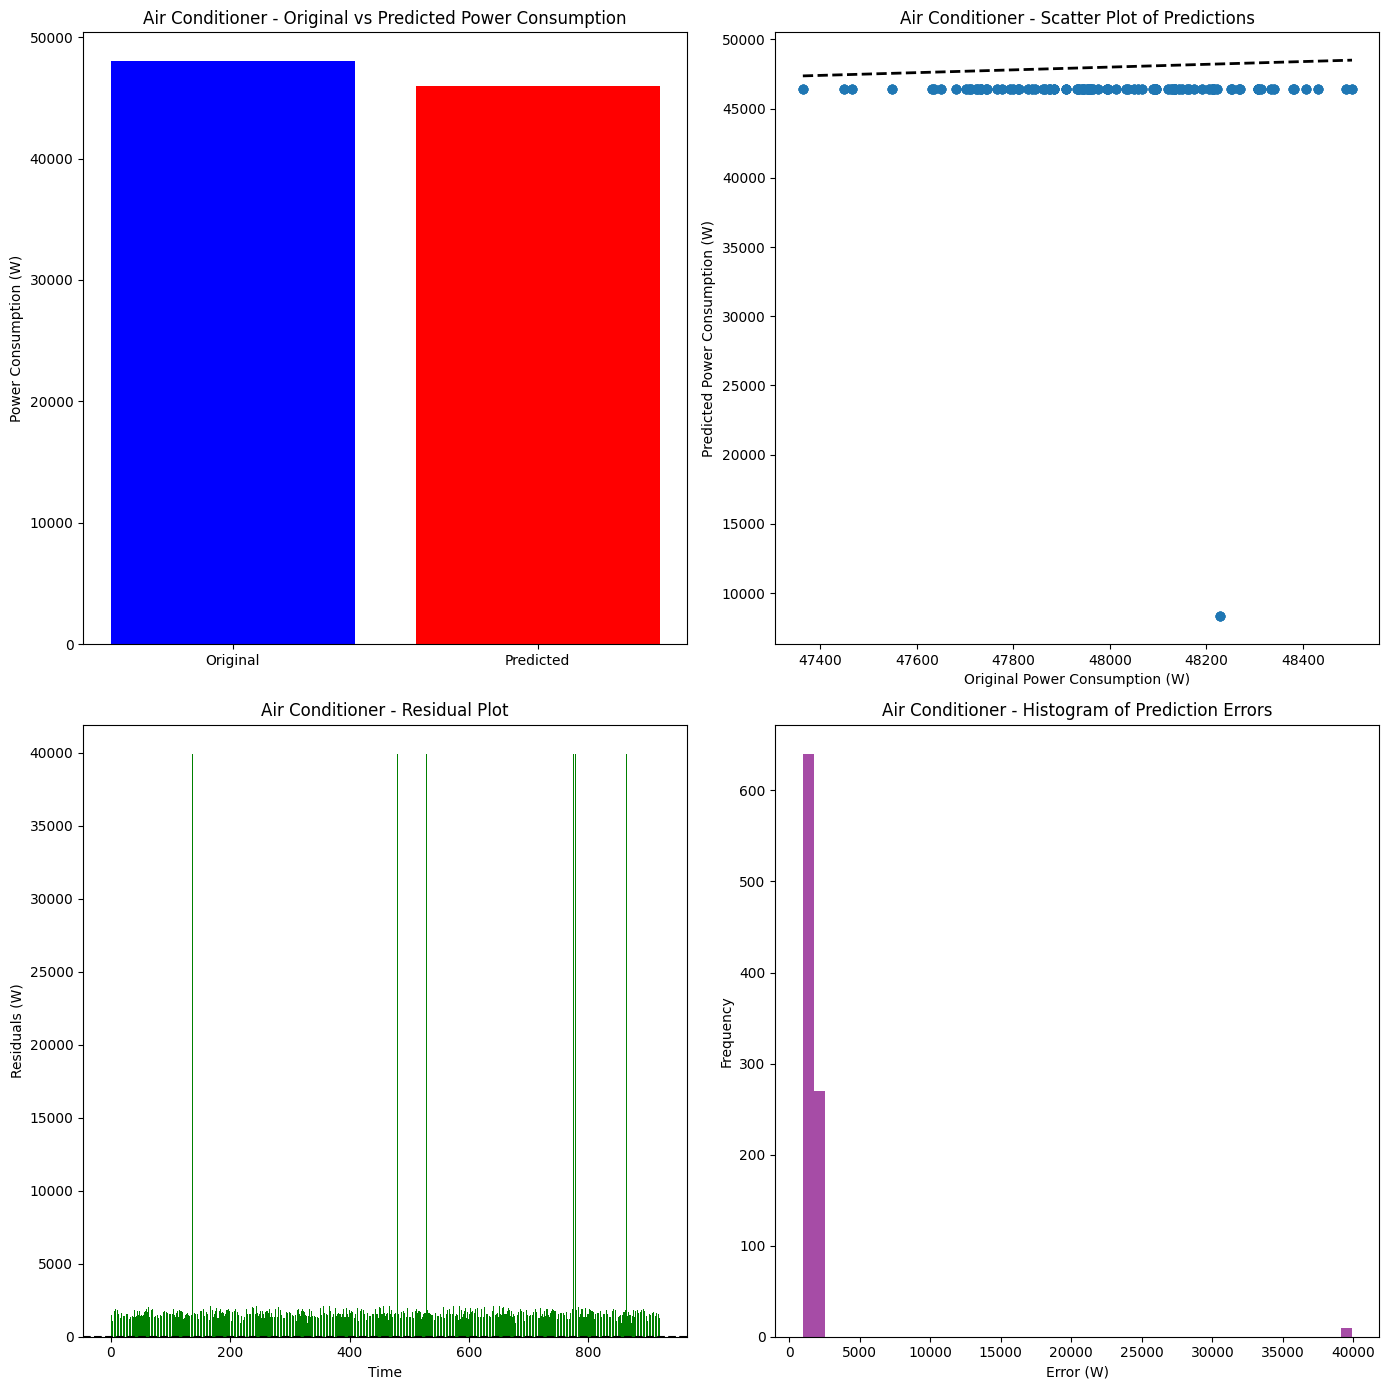

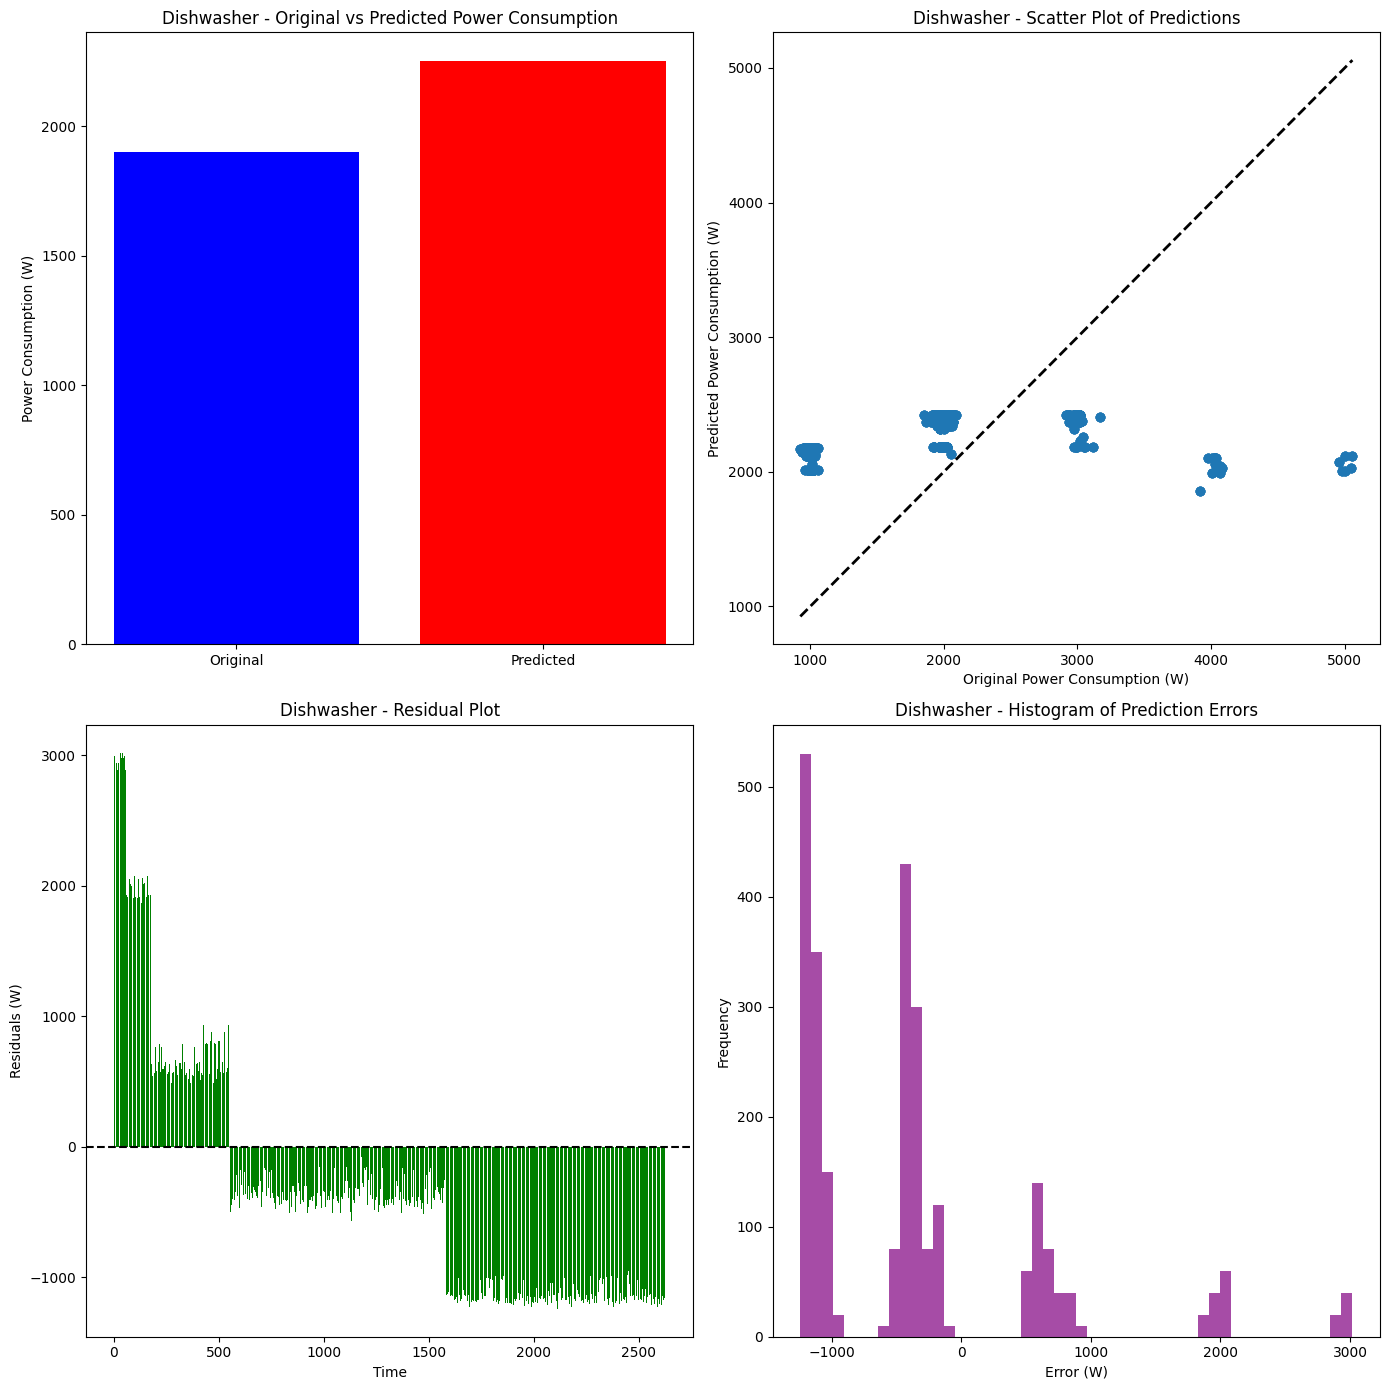

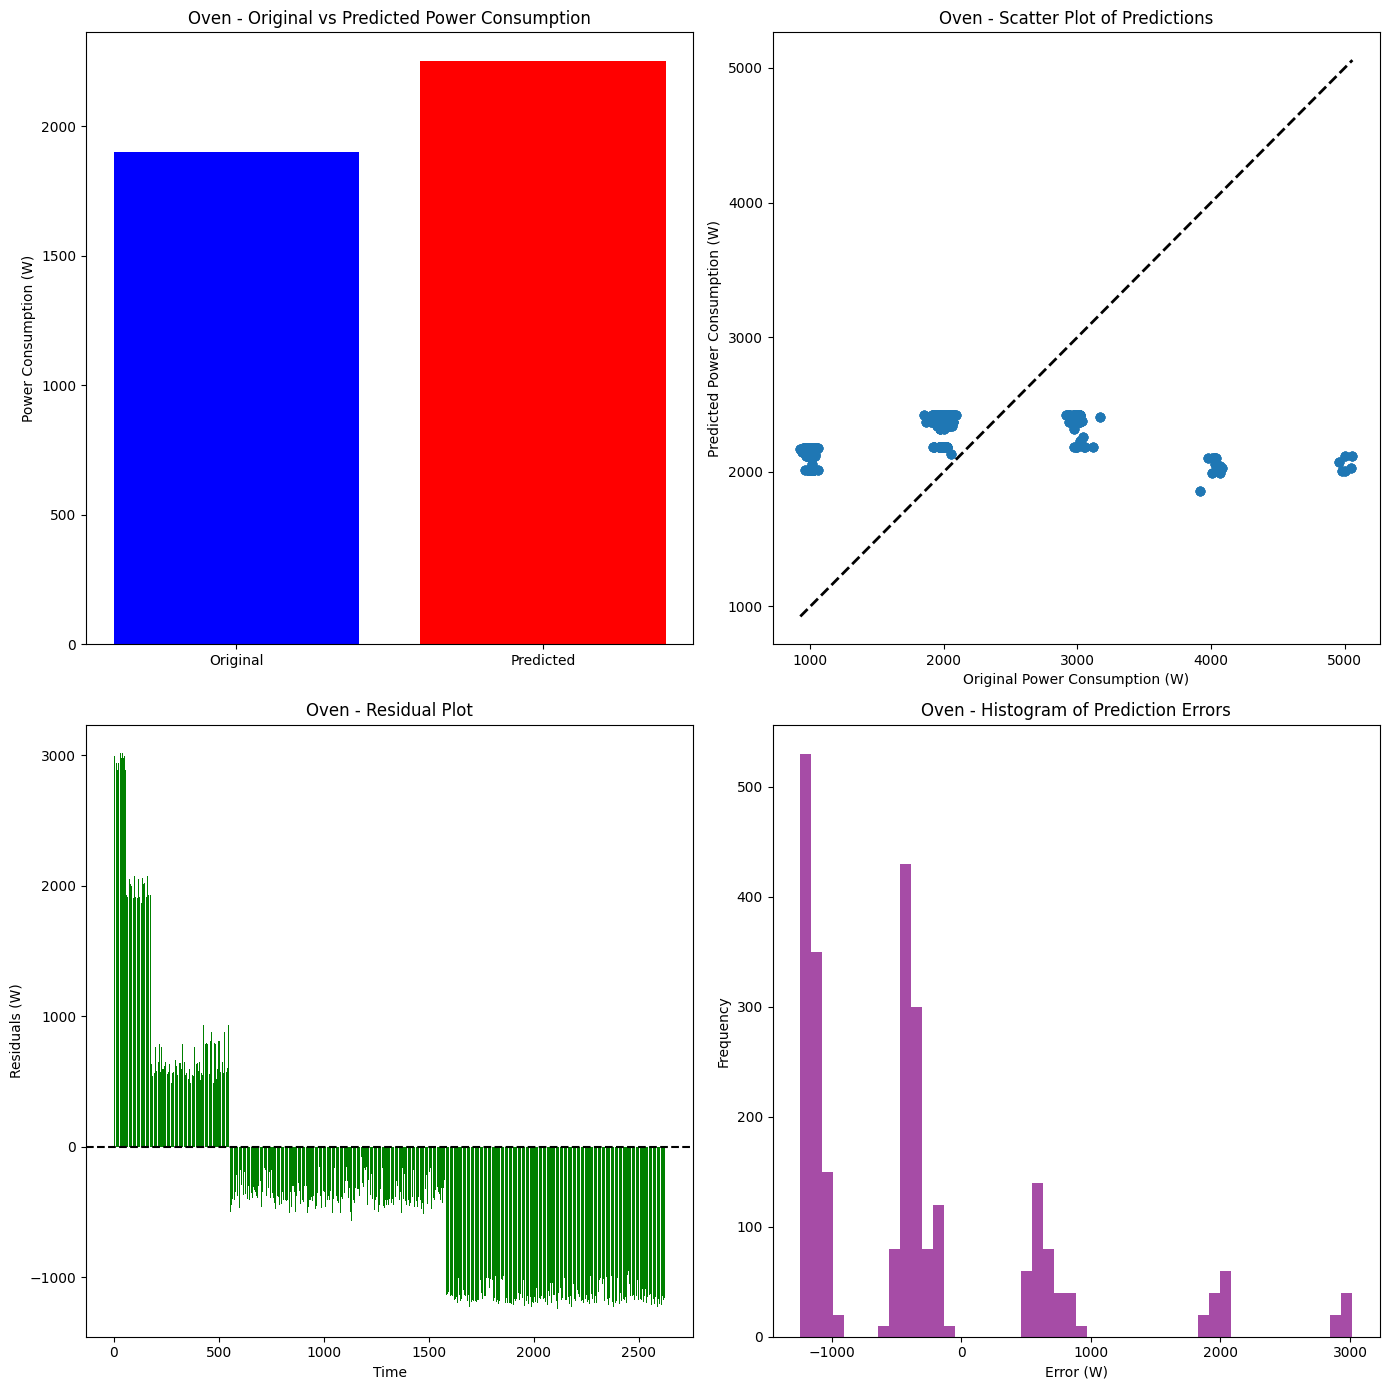

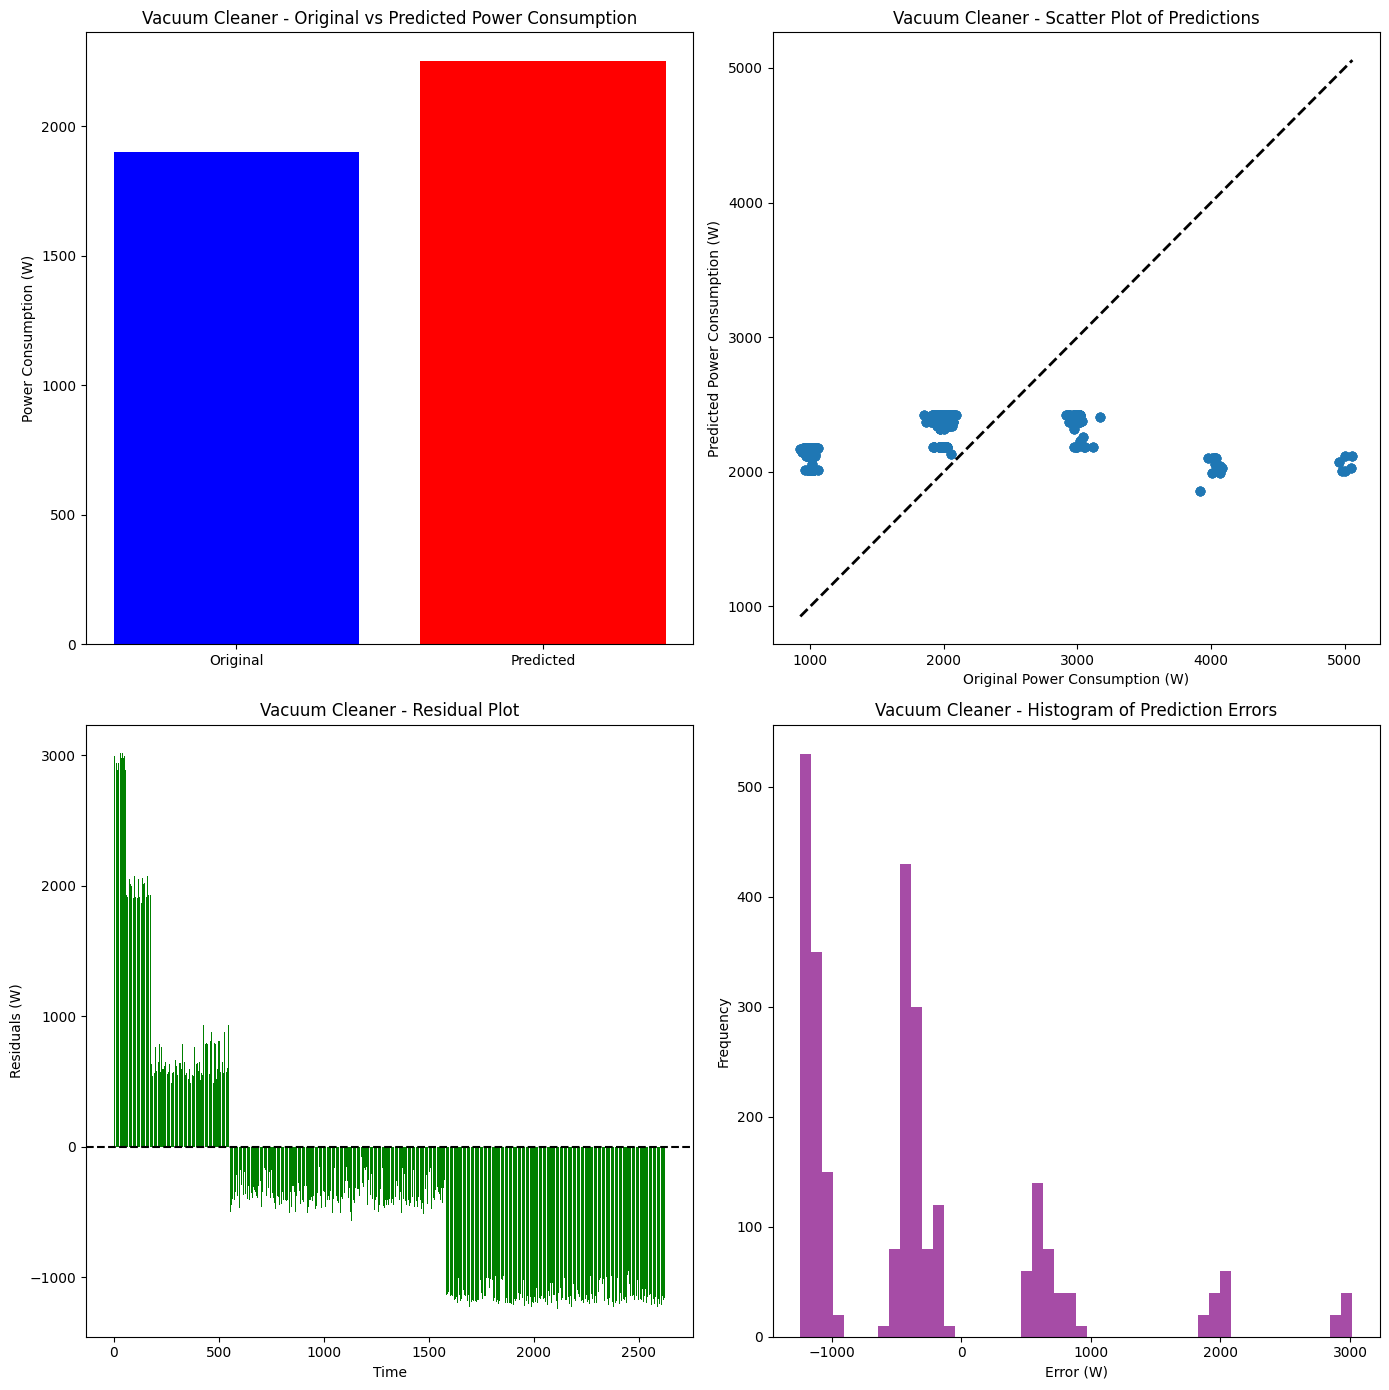

In [ ]:
# Example usage
# Assuming daily_synthetic_appliance_data is already defined
processor = ApplianceDataProcessor(daily_synthetic_appliance_data, models)

# Sort data and retrieve daily features and targets
processor.sort_data_by_appliance_type()
daily_appliance_features, targets = processor.daily_features_and_targets()

# Example for Refrigerator
appliance_dfs_refrigerator = processor.appliance_dfs[daily_appliance_features['Refrigerator']]
print(appliance_dfs_refrigerator.describe())


predicted_values = processor.appliance_predicted()
print(predicted_values)

# Analyze predictions
analysis_results = processor.analyze_predictions(predicted_values)

# Print the analysis results
for appliance, metrics in analysis_results.items():
    print(f"Analysis results for {appliance}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


processor.plot_predictions(predicted_values)